In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("Project") \
    .getOrCreate()

In [5]:
coffee_df = spark.read.csv("simplified_coffee.csv", header=True, inferSchema=True)
coffee_df.show(vertical=True)

-RECORD 0---------------------------
 name        | Ethiopia Shakiso ... 
 roaster     | Revel Coffee         
 roast       | Medium-Light         
 loc_country | United States        
 origin      | Ethiopia             
 100g_USD    | 4.7                  
 rating      | 92                   
 review_date | Nov-17               
 review      | Crisply sweet, co... 
-RECORD 1---------------------------
 name        | Ethiopia Suke Quto   
 roaster     | Roast House          
 roast       | Medium-Light         
 loc_country | United States        
 origin      | Ethiopia             
 100g_USD    | 4.19                 
 rating      | 92                   
 review_date | Nov-17               
 review      | Delicate, sweetly... 
-RECORD 2---------------------------
 name        | Ethiopia Gedeb Ha... 
 roaster     | Big Creek Coffee ... 
 roast       | Medium               
 loc_country | United States        
 origin      | Ethiopia             
 100g_USD    | 4.85                 
 

In [6]:

coffee_df.show(5)

+--------------------+--------------------+------------+-------------+--------+--------+------+-----------+--------------------+
|                name|             roaster|       roast|  loc_country|  origin|100g_USD|rating|review_date|              review|
+--------------------+--------------------+------------+-------------+--------+--------+------+-----------+--------------------+
|Ethiopia Shakiso ...|        Revel Coffee|Medium-Light|United States|Ethiopia|     4.7|    92|     Nov-17|Crisply sweet, co...|
|  Ethiopia Suke Quto|         Roast House|Medium-Light|United States|Ethiopia|    4.19|    92|     Nov-17|Delicate, sweetly...|
|Ethiopia Gedeb Ha...|Big Creek Coffee ...|      Medium|United States|Ethiopia|    4.85|    94|     Nov-17|Deeply sweet, sub...|
|Ethiopia Kayon Mo...|Red Rooster Coffe...|       Light|United States|Ethiopia|    5.14|    93|     Nov-17|Delicate, richly ...|
|Ethiopia Gelgelu ...|Willoughby's Coff...|Medium-Light|United States|Ethiopia|    3.97|    93|  

In [7]:
coffee_df.limit(5)


DataFrame[name: string, roaster: string, roast: string, loc_country: string, origin: string, 100g_USD: double, rating: int, review_date: string, review: string]

In [8]:
#Displaying 51 data columns with their data types
# Diabetes.info()
coffee_df.printSchema()

root
 |-- name: string (nullable = true)
 |-- roaster: string (nullable = true)
 |-- roast: string (nullable = true)
 |-- loc_country: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- 100g_USD: double (nullable = true)
 |-- rating: integer (nullable = true)
 |-- review_date: string (nullable = true)
 |-- review: string (nullable = true)



In [9]:
#Checking for missing data and replacing '?' in inputs with 'NaN'

coffee_df = coffee_df.na.replace('?', 'NaN')
coffee_df.show(5)


+--------------------+--------------------+------------+-------------+--------+--------+------+-----------+--------------------+
|                name|             roaster|       roast|  loc_country|  origin|100g_USD|rating|review_date|              review|
+--------------------+--------------------+------------+-------------+--------+--------+------+-----------+--------------------+
|Ethiopia Shakiso ...|        Revel Coffee|Medium-Light|United States|Ethiopia|     4.7|    92|     Nov-17|Crisply sweet, co...|
|  Ethiopia Suke Quto|         Roast House|Medium-Light|United States|Ethiopia|    4.19|    92|     Nov-17|Delicate, sweetly...|
|Ethiopia Gedeb Ha...|Big Creek Coffee ...|      Medium|United States|Ethiopia|    4.85|    94|     Nov-17|Deeply sweet, sub...|
|Ethiopia Kayon Mo...|Red Rooster Coffe...|       Light|United States|Ethiopia|    5.14|    93|     Nov-17|Delicate, richly ...|
|Ethiopia Gelgelu ...|Willoughby's Coff...|Medium-Light|United States|Ethiopia|    3.97|    93|  

In [10]:
#Checking for any null values in columns
coffee_pd = coffee_df.toPandas()
coffee_pd.isnull().sum()

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

In [11]:

coffee_pd = coffee_pd.drop(columns=['review', 'review_date'])

In [12]:
coffee_pd['origin'] = coffee_pd['origin'].replace("Hawai'I", "Hawaii")


In [13]:
coffee_pd['origin'] = coffee_pd['origin'].replace("Democratic Republic Of The Congo", "D. R. Congo")


In [14]:
coffee_pd['origin'] = coffee_pd['origin'].replace("Dominican Republic", "D. Republic")


In [15]:
coffee_pd['loc_country'] = coffee_pd['loc_country'].replace("Hawai'I", "Hawaii")

In [16]:
coffee_pd['loc_country'] = coffee_pd['loc_country'].replace("Hawai'i", "Hawaii")

<Figure size 1400x800 with 0 Axes>

<Axes: >

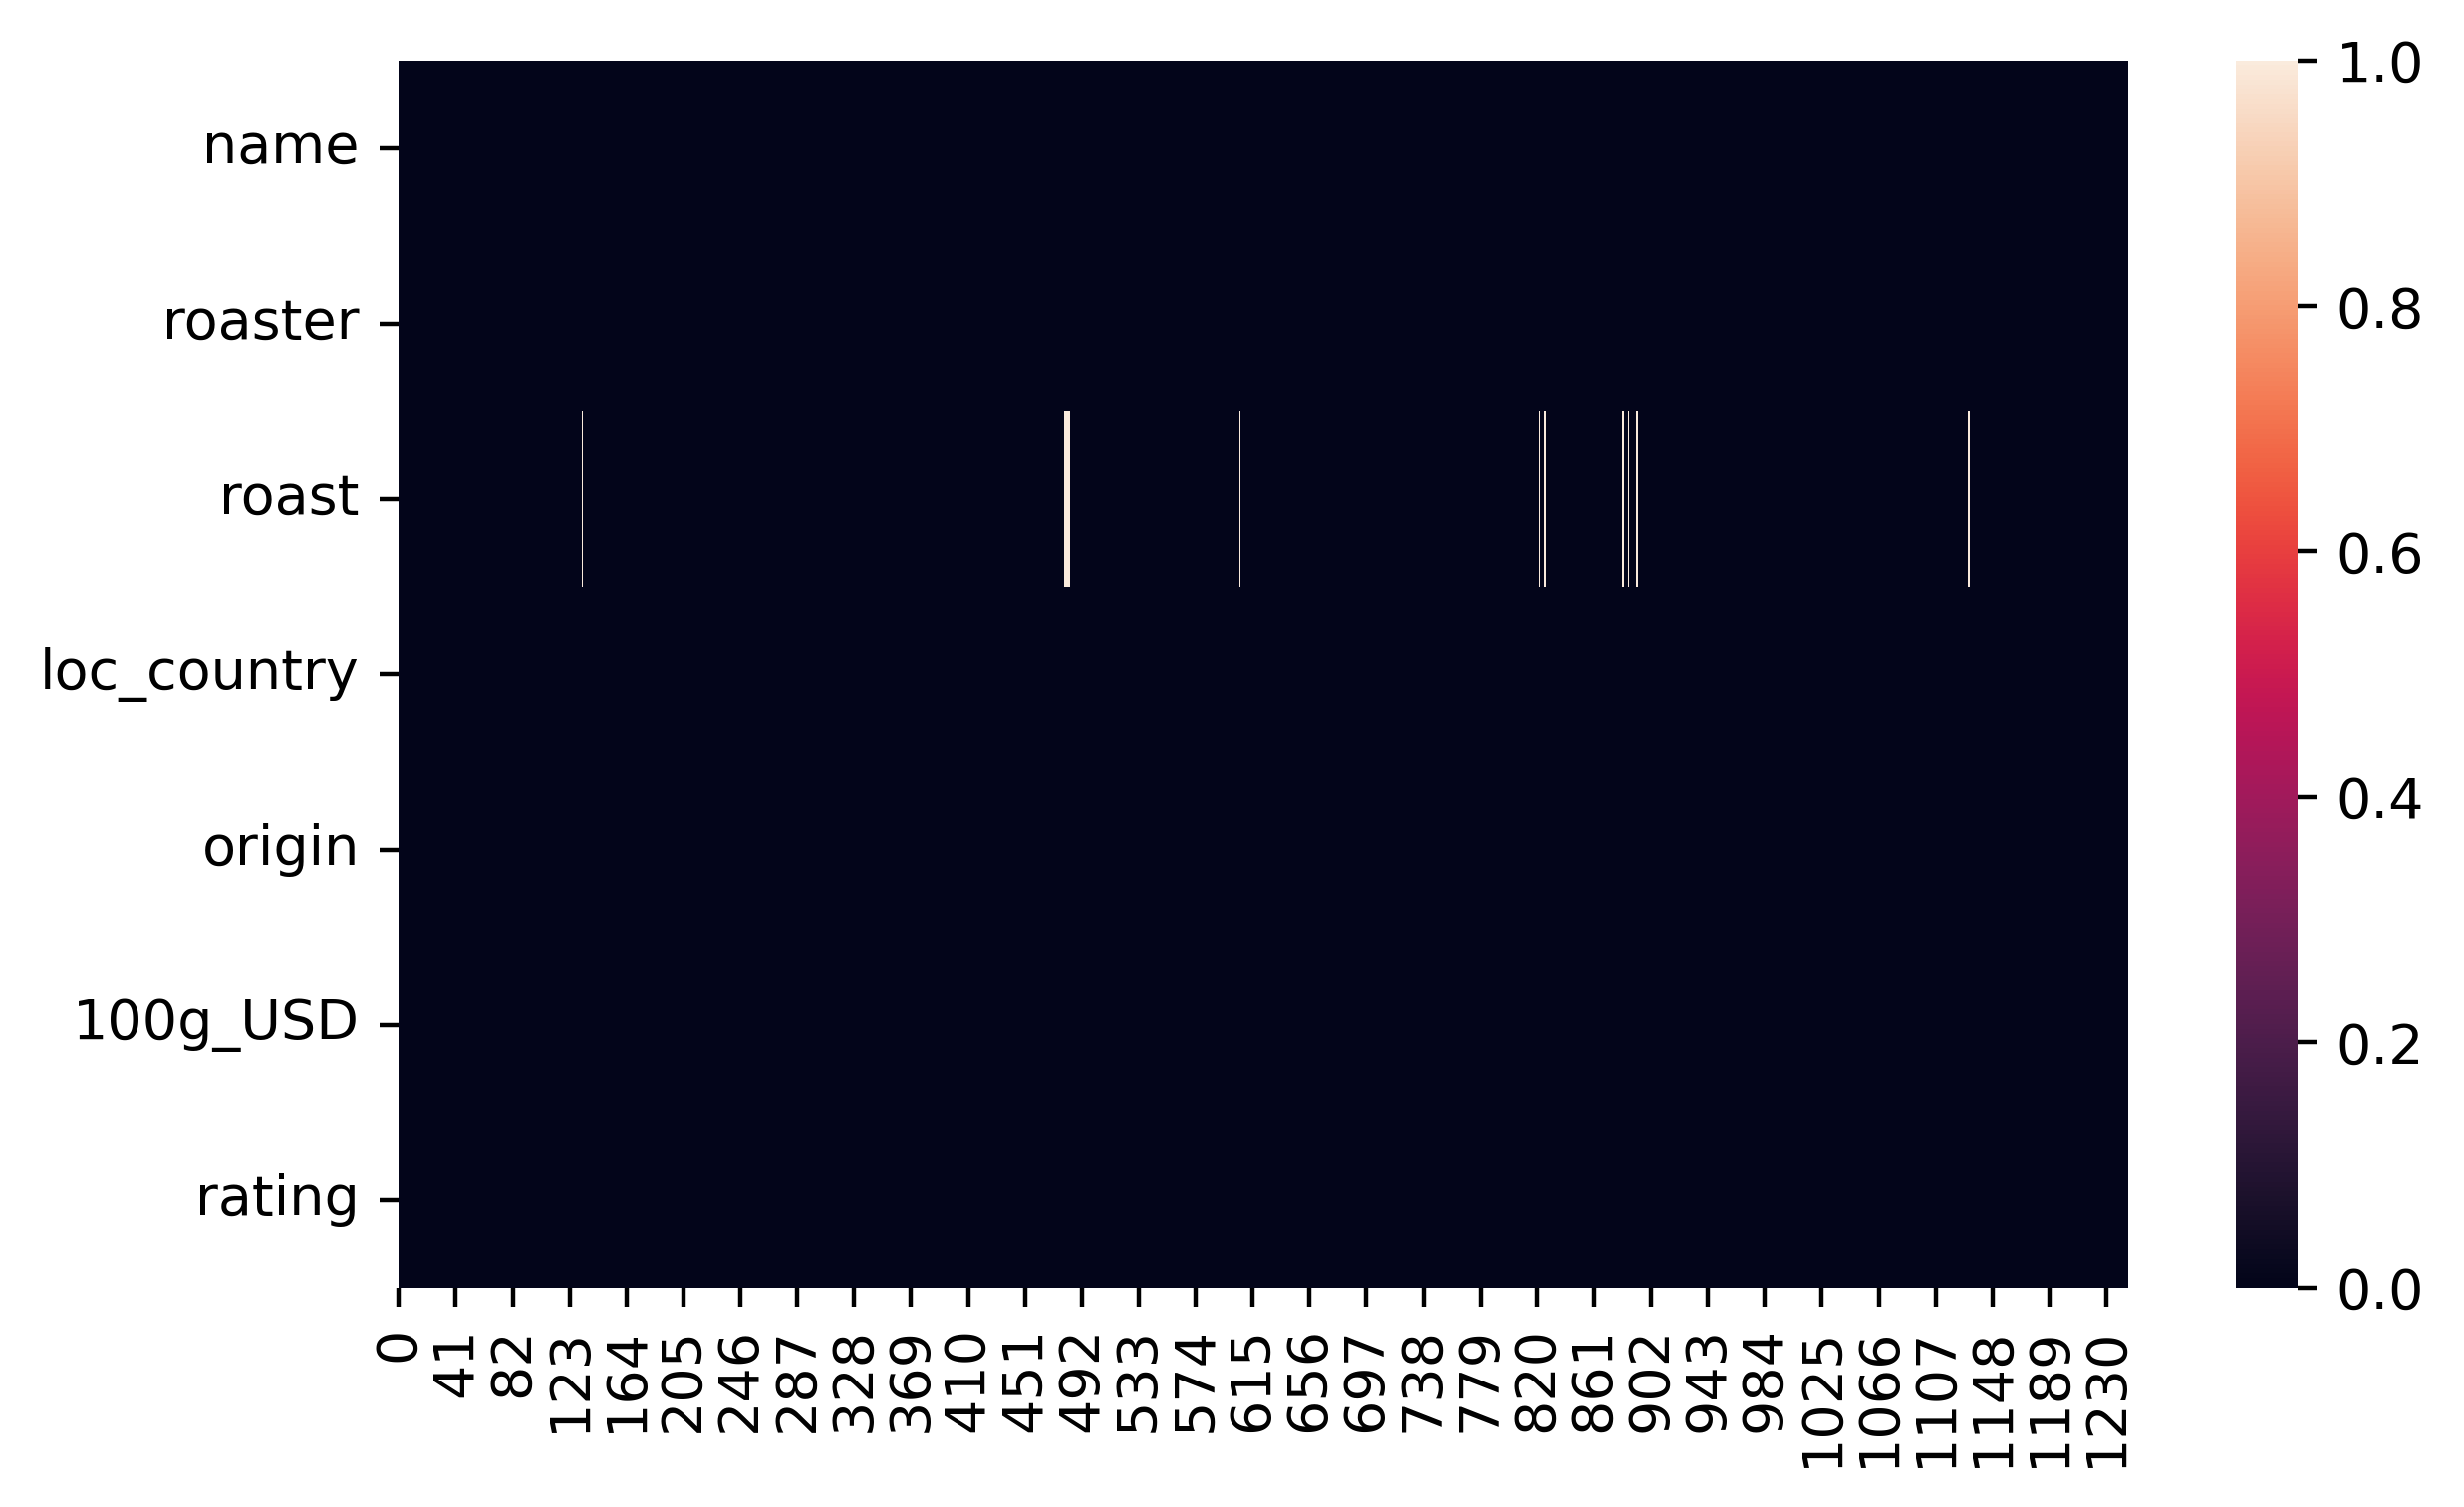

In [17]:

plt.figure(figsize = [7,4], dpi = 200)
sns.heatmap(coffee_pd.isnull().transpose())



<Figure size 1400x800 with 0 Axes>

<Axes: >

([<matplotlib.axis.YTick at 0x7fbdb198b710>,
 [Text(0, 0, 'Name of Cafe'),
  Text(0, 1, 'Roaster'),
  Text(0, 2, 'Roast'),
  Text(0, 3, 'Roaster Country'),
  Text(0, 4, 'Coffee Origin'),
  Text(0, 5, 'Price of 100g'),
  Text(0, 6, 'Rating')])

Text(0.5, 1.0, 'Missing Data Heatmap with Renamed Columns')

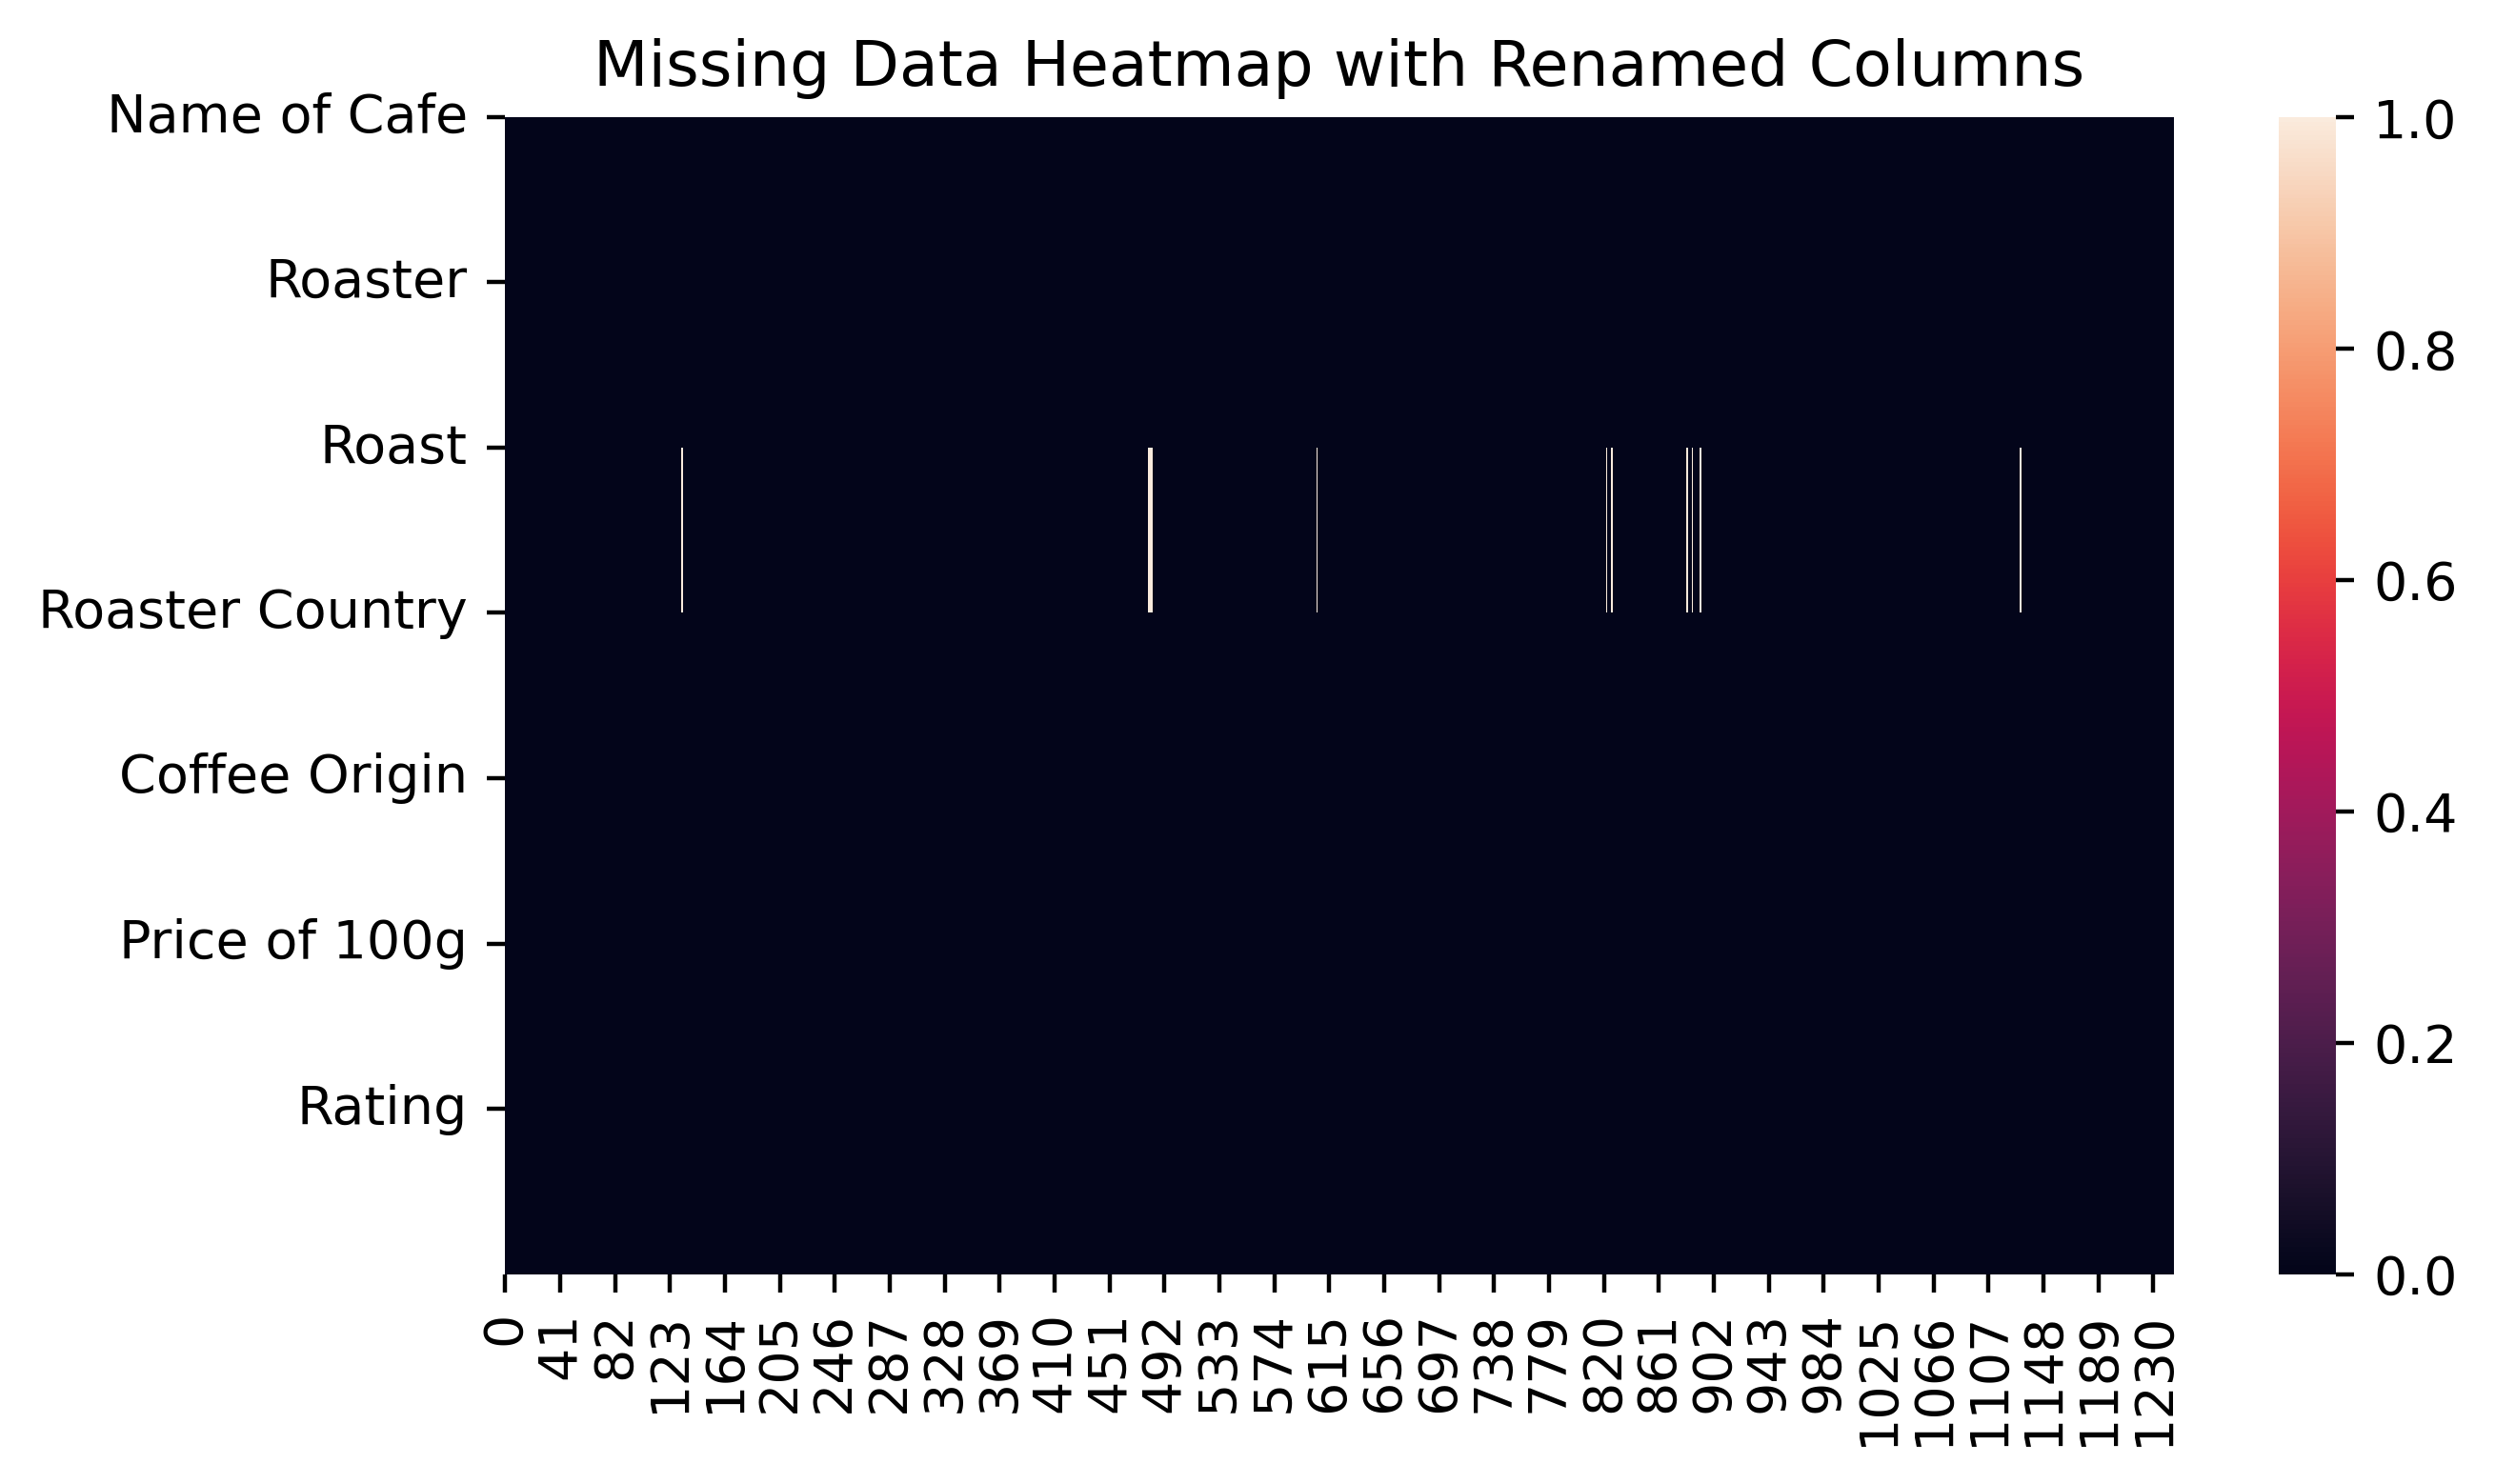

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom column names for visualization only
new_column_names = ['Name of Cafe', 'Roaster', 'Roast', 'Roaster Country', 'Coffee Origin', 'Price of 100g', 'Rating']

plt.figure(figsize=[7, 4], dpi=200)
sns.heatmap(coffee_pd.isnull().transpose(), cbar=True)

# Rename the y-axis (since columns are transposed)
plt.yticks(ticks=range(len(new_column_names)), labels=new_column_names, rotation=0)

plt.title("Missing Data Heatmap with Renamed Columns")
plt.tight_layout()
plt.show()


In [20]:

coffee_pd = coffee_pd.where(~coffee_pd.roast.isnull(), coffee_pd.fillna(axis=0, method='ffill'))
coffee_pd['roast']


0       Medium-Light
1       Medium-Light
2             Medium
3              Light
4       Medium-Light
            ...     
1241    Medium-Light
1242    Medium-Light
1243    Medium-Light
1244    Medium-Light
1245    Medium-Light
Name: roast, Length: 1246, dtype: object

In [21]:
#Displaying the total count of race of diabetes patients admitted to hospital

Roast_variation_of_Dataset = coffee_pd.groupby(["roast"]).size().sort_values(ascending = False)
Roast_variation_of_Dataset 


roast
Medium-Light    914
Light           199
Medium          115
Medium-Dark      15
Dark              3
dtype: int64

<Figure size 900x900 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fbdb1ccdcd0>,
 [Text(-0.7365930703761947, 0.8169642884935489, 'Medium-Light'),
  Text(0.465501978479553, -1.1060325076739932, 'Light'),
  Text(1.0482432819904677, -0.7688862215970924, 'Medium-Dark'),
  Text(1.2399688112153264, -0.39048347879679907, 'Medium'),
  Text(1.2999628097813056, -0.009833269318657006, 'Dark')],
 [Text(-0.40177803838701526, 0.44561688463284477, '73.35%'),
  Text(0.27154282077973924, -0.645185629476496, '15.97%'),
  Text(0.6450727889172108, -0.4731607517520568, '1.20%'),
  Text(0.7630577299786623, -0.24029752541341481, '9.23%'),
  Text(0.7999771137115727, -0.006051242657635079, '0.24%')])

Text(0.5, 1.0, 'Distribution of Customer Preferences by Coffee Roast Level')

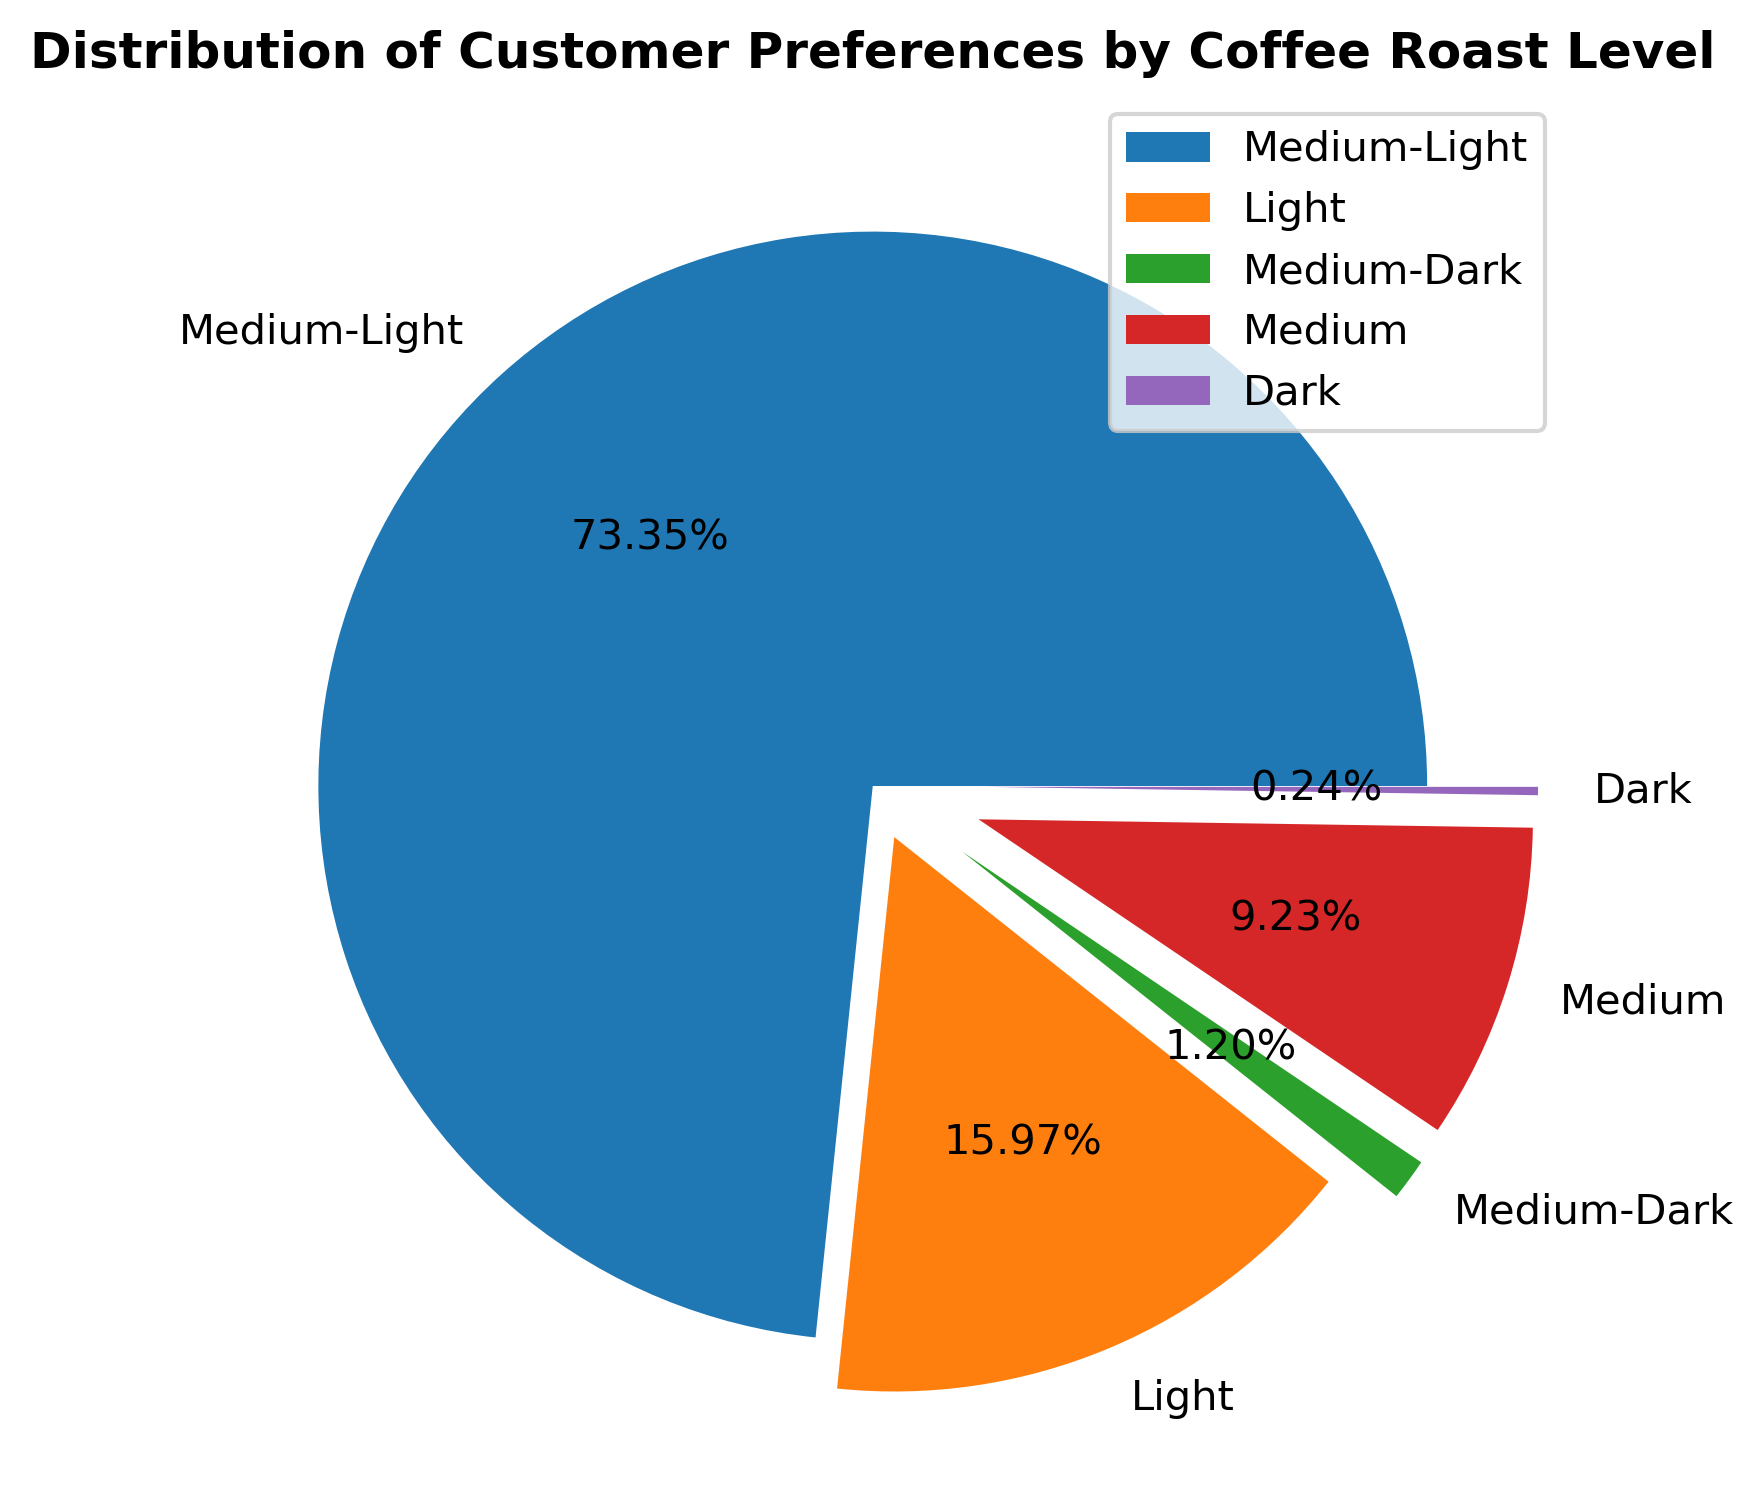

In [23]:
#Plotting the variation of Diabetes patients based on their race on a pie chart 

Medium_Light = Roast_variation_of_Dataset['Medium-Light']
Light = Roast_variation_of_Dataset['Light']
Medium_Dark = Roast_variation_of_Dataset['Medium-Dark']
Medium = Roast_variation_of_Dataset['Medium']
Dark = Roast_variation_of_Dataset['Dark']

labels = ["Medium-Light", "Light", "Medium-Dark", "Medium", "Dark"]
plt.figure(figsize = [6,6],dpi=150)
explode = [0,0.1,0.2,0.2,0.2]

plt.pie([Medium_Light, Light, Medium_Dark, Medium, Dark],labels = labels,autopct = "%0.2f%%", explode = explode)
plt.title("Distribution of Customer Preferences by Coffee Roast Level", fontdict = {"fontweight": "bold"})
plt.legend()




In [21]:
coffee_pd.groupby(["origin"]).size()

origin
Bolivia          2
Brazil          15
Burundi         12
Colombia       151
Costa Rica      46
D. R. Congo     14
D. Republic      2
Ecuador          8
El Salvador     14
Ethiopia       447
Guatemala       96
Hawaii         113
Honduras         6
Indonesia       28
Kenya          143
Mexico          11
Nepal            2
Nicaragua       11
Panama          70
Peru            13
Philippines      2
Rwanda          12
Taiwan           9
Tanzania         2
Thailand         2
Uganda           2
Yemen           13
dtype: int64

<Figure size 1500x600 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 1.0, 'Distribution of Coffee Origins')

Text(0.5, 0, 'Origin Country')

Text(0, 0.5, 'Number of Cafes')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Ethiopia'),
  Text(1, 0, 'Colombia'),
  Text(2, 0, 'Kenya'),
  Text(3, 0, 'Hawaii'),
  Text(4, 0, 'Guatemala'),
  Text(5, 0, 'Panama'),
  Text(6, 0, 'Costa Rica'),
  Text(7, 0, 'Indonesia'),
  Text(8, 0, 'Brazil'),
  Text(9, 0, 'El Salvador'),
  Text(10, 0, 'D. R. Congo'),
  Text(11, 0, 'Yemen'),
  Text(12, 0, 'Peru'),
  Text(13, 0, 'Rwanda'),
  Text(14, 0, 'Burundi'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Nicaragua'),
  Text(17, 0, 'Taiwan'),
  Text(18, 0, 'Ecuador'),
  Text(19, 0, 'Honduras'),
  Text(20, 0, 'Nepal'),
  Text(21, 0, 'Bolivia'),
  Text(22, 0, 'D. Republic'),
  Text(23, 0, 'Thailand'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Tanzania'),
  Text(26, 0, 'Philippines')])

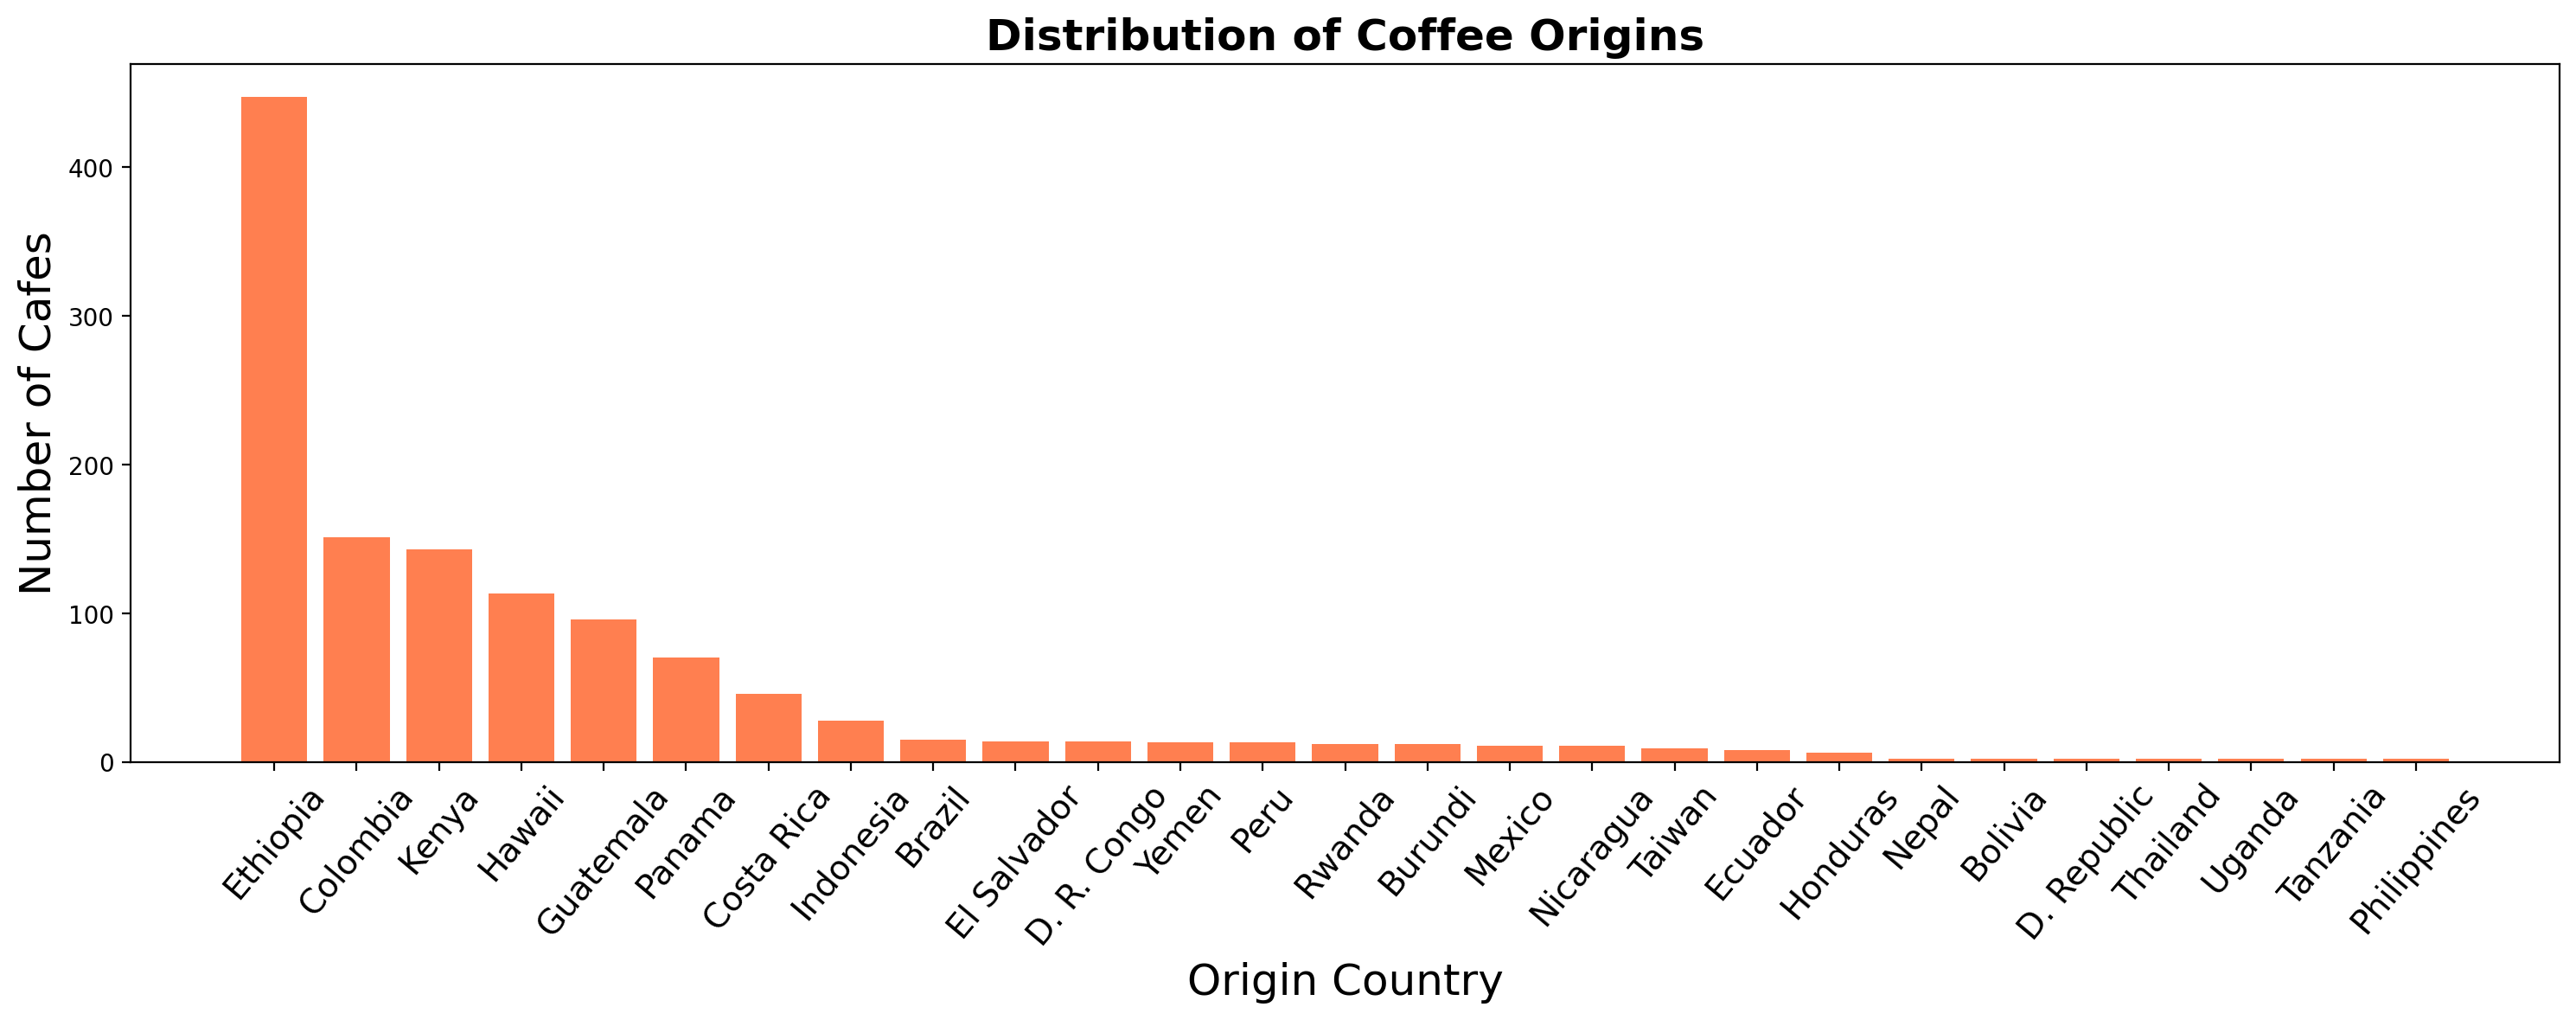

In [24]:

origin_counts = coffee_pd['origin'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(origin_counts.index, origin_counts.values, color='coral')
plt.title("Distribution of Coffee Origins", fontsize=18, fontweight='bold')
plt.xlabel("Origin Country", fontsize=18)
plt.ylabel("Number of Cafes", fontsize=18)
plt.xticks(rotation=50, fontsize=14)  # Rotate labels for better visibility
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Distribution of Top 10 Coffee Origins')

Text(0.5, 0, 'Origin Country')

Text(0, 0.5, 'Number of Cafes')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ethiopia'),
  Text(1, 0, 'Colombia'),
  Text(2, 0, 'Kenya'),
  Text(3, 0, 'Hawaii'),
  Text(4, 0, 'Guatemala'),
  Text(5, 0, 'Panama'),
  Text(6, 0, 'Costa Rica'),
  Text(7, 0, 'Indonesia'),
  Text(8, 0, 'Brazil'),
  Text(9, 0, 'El Salvador')])

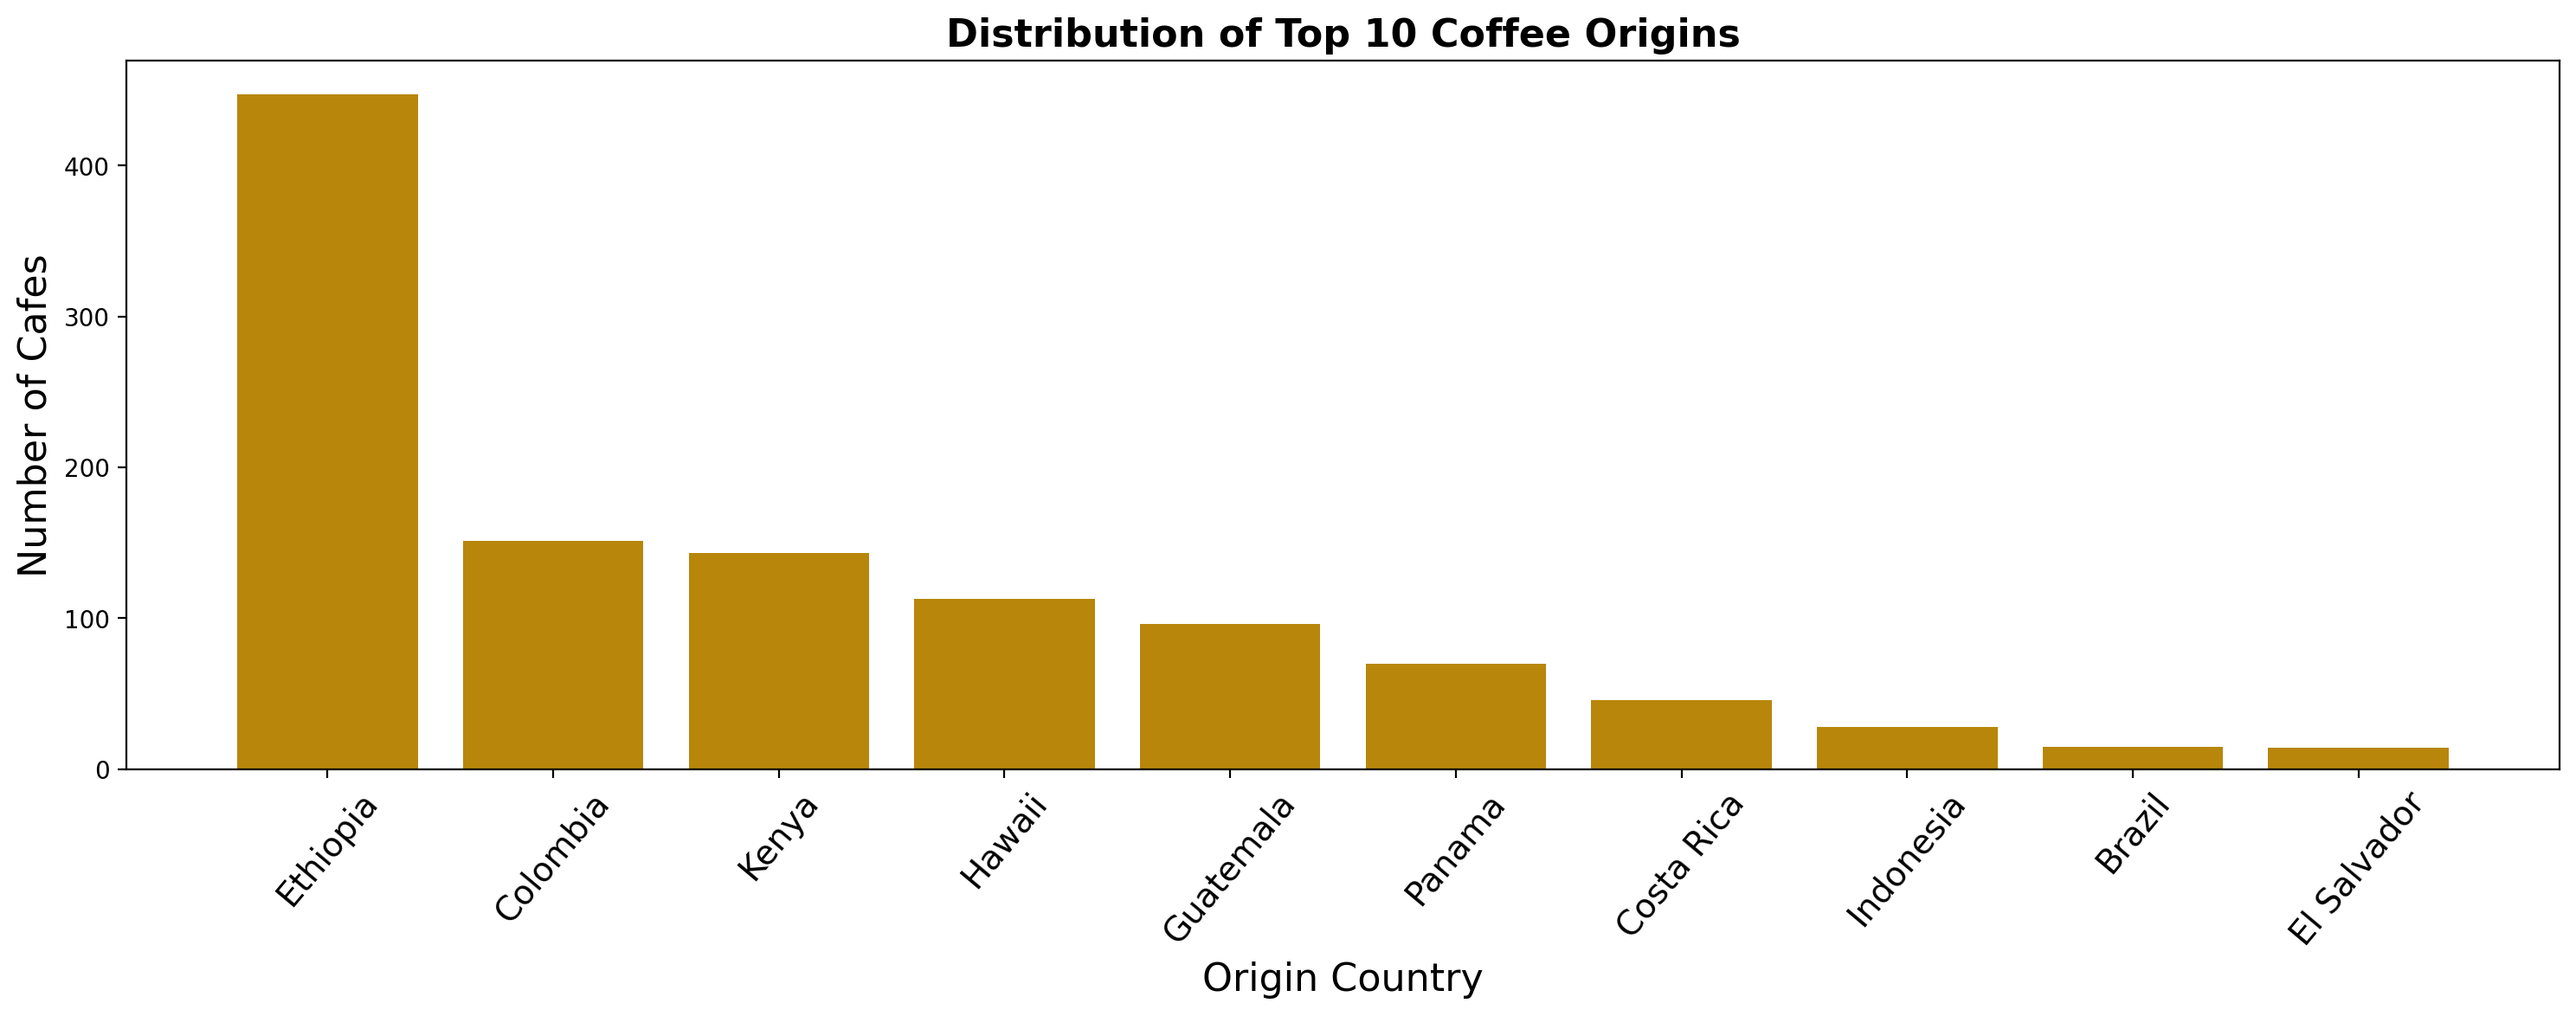

In [25]:

origin_counts = coffee_pd['origin'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(origin_counts.index, origin_counts.values, color='darkgoldenrod')
plt.title("Distribution of Top 10 Coffee Origins", fontsize=16, fontweight='bold')
plt.xlabel("Origin Country", fontsize=16)
plt.ylabel("Number of Cafes", fontsize=16)
plt.xticks(rotation=50, fontsize=14)  # Rotate labels for better visibility
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Average Price of 100g Coffee by Origin Country (USD)')

Text(0.5, 0, 'Origin Country')

Text(0, 0.5, 'Average Price (USD)')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Tanzania'),
  Text(1, 0, 'Ecuador'),
  Text(2, 0, 'Panama'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'Hawaii'),
  Text(5, 0, 'Yemen'),
  Text(6, 0, 'Philippines'),
  Text(7, 0, 'Bolivia'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'El Salvador'),
  Text(10, 0, 'Nicaragua'),
  Text(11, 0, 'Nepal'),
  Text(12, 0, 'Ethiopia'),
  Text(13, 0, 'Kenya'),
  Text(14, 0, 'Costa Rica'),
  Text(15, 0, 'Honduras'),
  Text(16, 0, 'Burundi'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Guatemala'),
  Text(19, 0, 'Indonesia'),
  Text(20, 0, 'Peru'),
  Text(21, 0, 'Uganda'),
  Text(22, 0, 'D. R. Congo'),
  Text(23, 0, 'Rwanda'),
  Text(24, 0, 'Mexico'),
  Text(25, 0, 'Thailand'),
  Text(26, 0, 'D. Republic')])

Text(0.0, 68.32, '68')

Text(1.0, 35.637499999999996, '35')

Text(2.0, 32.05357142857143, '32')

Text(3.0, 20.144444444444446, '20')

Text(4.0, 19.437345132743364, '19')

Text(5.0, 16.727692307692305, '16')

Text(6.0, 13.67, '13')

Text(7.0, 11.91, '11')

Text(8.0, 9.933046357615895, '9')

Text(9.0, 9.852142857142857, '9')

Text(10.0, 8.67090909090909, '8')

Text(11.0, 7.91, '7')

Text(12.0, 7.501543624161074, '7')

Text(13.0, 7.298671328671329, '7')

Text(14.0, 7.2658695652173915, '7')

Text(15.0, 6.386666666666667, '6')

Text(16.0, 6.3374999999999995, '6')

Text(17.0, 6.182666666666666, '6')

Text(18.0, 6.106145833333334, '6')

Text(19.0, 6.033214285714286, '6')

Text(20.0, 5.608461538461539, '5')

Text(21.0, 5.585, '5')

Text(22.0, 5.481428571428571, '5')

Text(23.0, 5.426666666666667, '5')

Text(24.0, 5.385454545454546, '5')

Text(25.0, 4.98, '4')

Text(26.0, 3.82, '3')

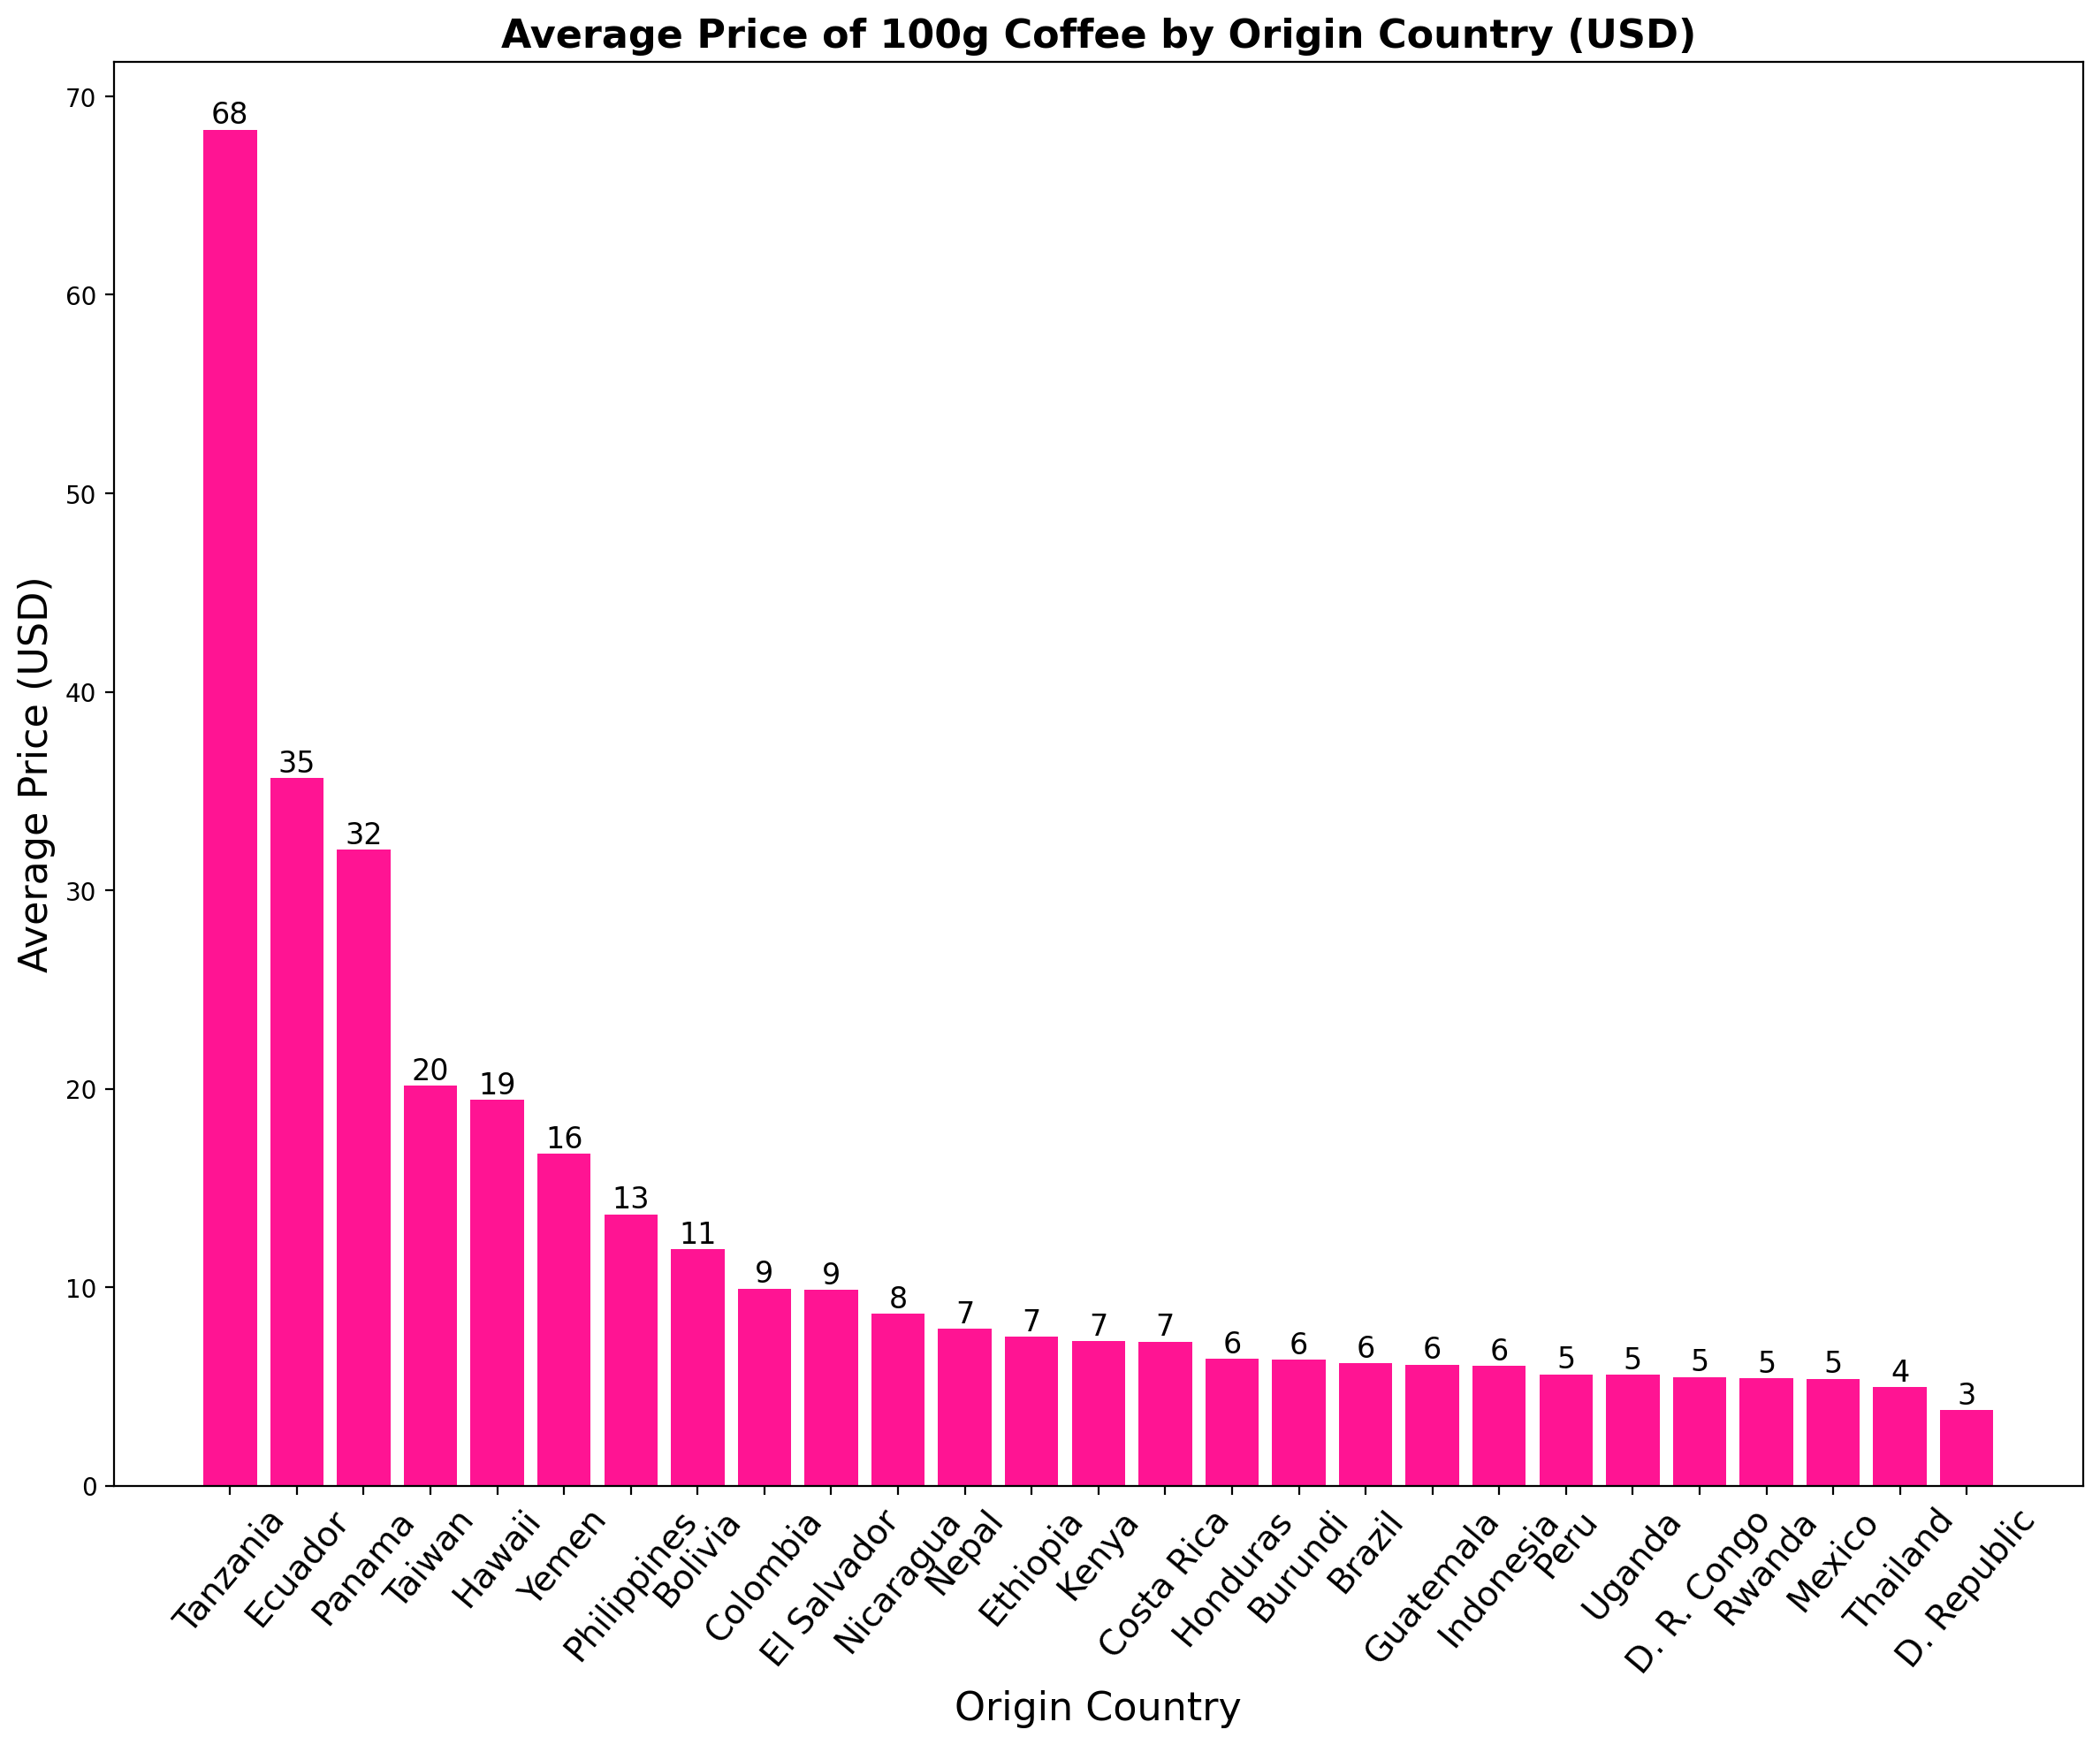

In [26]:

avg_price_by_origin = coffee_pd.groupby('origin')['100g_USD'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 10))
bars_purp = plt.bar(avg_price_by_origin.index, avg_price_by_origin.values, color='deeppink')
plt.title("Average Price of 100g Coffee by Origin Country (USD)", fontsize=16, fontweight='bold')
plt.xlabel("Origin Country", fontsize=16)
plt.ylabel("Average Price (USD)", fontsize=16)
plt.xticks(rotation=50, fontsize=14)

for bar in bars_purp:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                            # Y position (top of bar)
        f'{int(height)}',                  # Label text
        ha='center', va='bottom', fontsize=12  # Centered horizontally, slightly above the bar
    )

plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Average Price of 100g Coffee by Origin Country (USD)')

Text(0.5, 0, 'Origin Country')

Text(0, 0.5, 'Average Price (USD)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Tanzania'),
  Text(1, 0, 'Ecuador'),
  Text(2, 0, 'Panama'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'Hawaii'),
  Text(5, 0, 'Yemen'),
  Text(6, 0, 'Philippines'),
  Text(7, 0, 'Bolivia'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'El Salvador'),
  Text(10, 0, 'Nicaragua'),
  Text(11, 0, 'Nepal'),
  Text(12, 0, 'Ethiopia'),
  Text(13, 0, 'Kenya'),
  Text(14, 0, 'Costa Rica'),
  Text(15, 0, 'Honduras'),
  Text(16, 0, 'Burundi'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Guatemala'),
  Text(19, 0, 'Indonesia')])

Text(0.0, 68.32, '68')

Text(1.0, 35.637499999999996, '35')

Text(2.0, 32.05357142857143, '32')

Text(3.0, 20.144444444444446, '20')

Text(4.0, 19.437345132743364, '19')

Text(5.0, 16.727692307692305, '16')

Text(6.0, 13.67, '13')

Text(7.0, 11.91, '11')

Text(8.0, 9.933046357615895, '9')

Text(9.0, 9.852142857142857, '9')

Text(10.0, 8.67090909090909, '8')

Text(11.0, 7.91, '7')

Text(12.0, 7.501543624161074, '7')

Text(13.0, 7.298671328671329, '7')

Text(14.0, 7.2658695652173915, '7')

Text(15.0, 6.386666666666667, '6')

Text(16.0, 6.3374999999999995, '6')

Text(17.0, 6.182666666666666, '6')

Text(18.0, 6.106145833333334, '6')

Text(19.0, 6.033214285714286, '6')

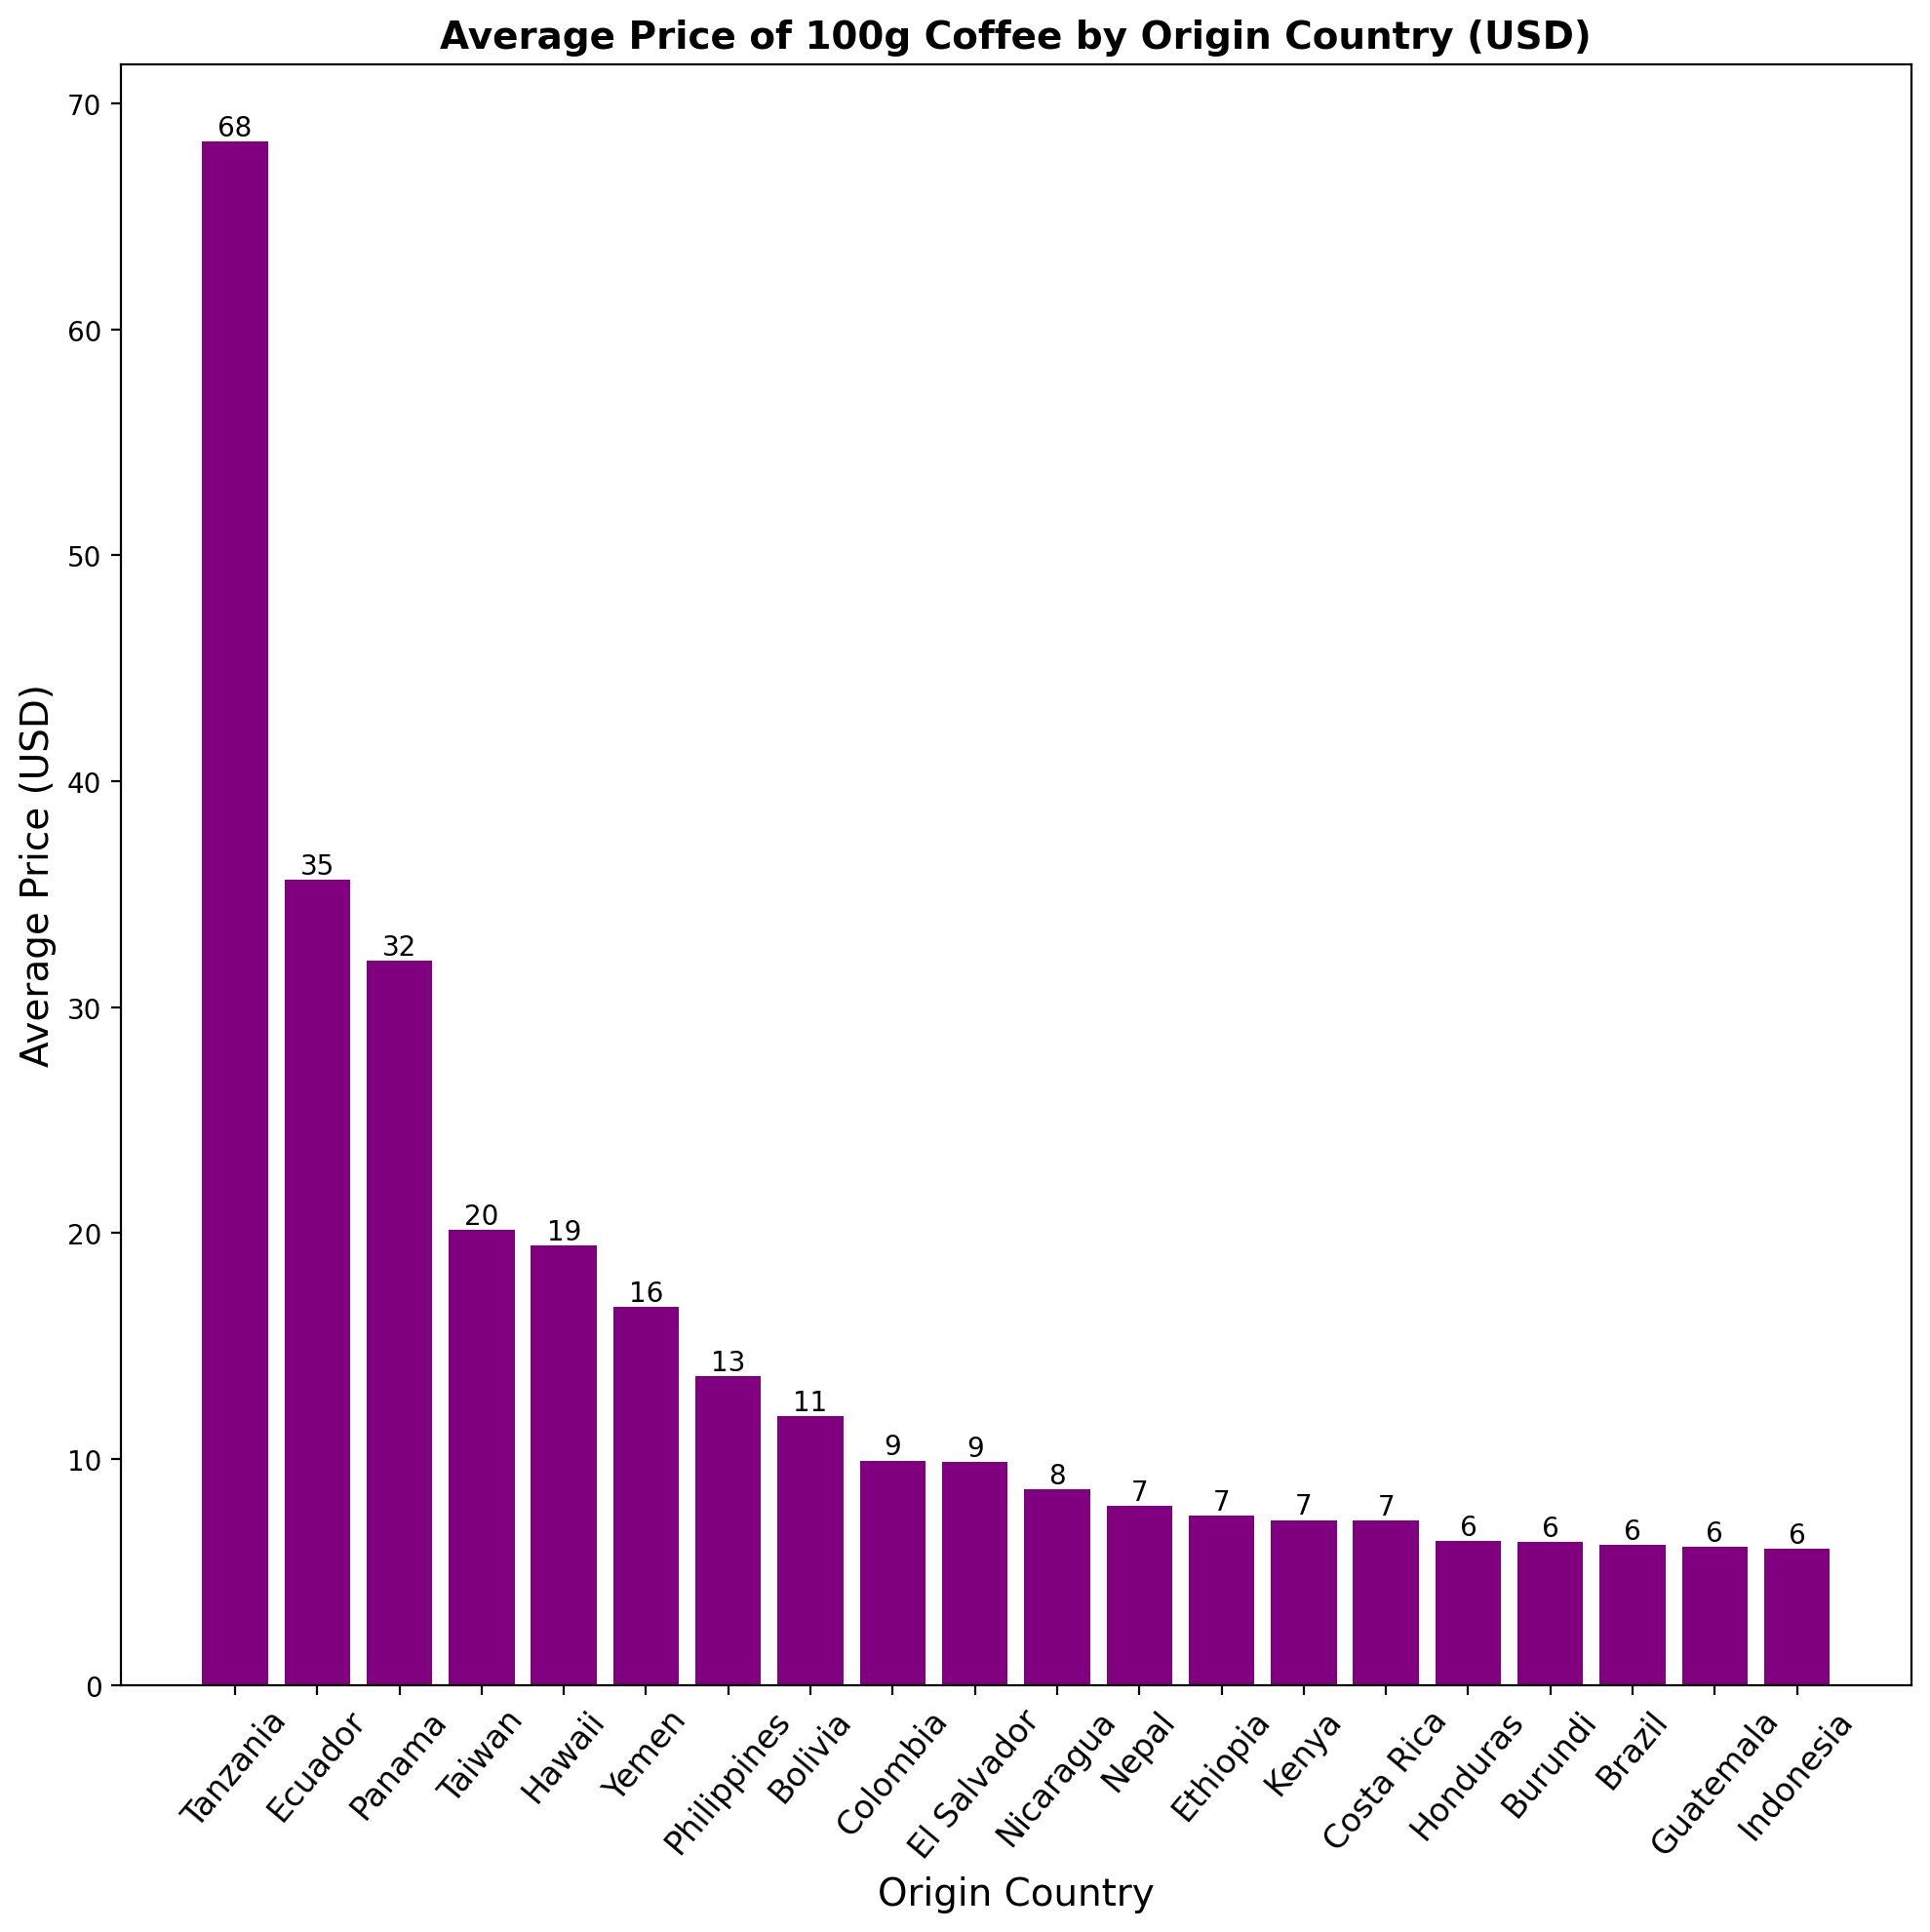

In [27]:

avg_price_by_origin = coffee_pd.groupby('origin')['100g_USD'].mean().sort_values(ascending=False).head(20)

# Plot bar chart
plt.figure(figsize=(10, 10))
bars_purp = plt.bar(avg_price_by_origin.index, avg_price_by_origin.values, color='purple')
plt.title("Average Price of 100g Coffee by Origin Country (USD)", fontsize=14, fontweight='bold')
plt.xlabel("Origin Country", fontsize=14)
plt.ylabel("Average Price (USD)", fontsize=14)
plt.xticks(rotation=50, fontsize=12)

for bar in bars_purp:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                            # Y position (top of bar)
        f'{int(height)}',                  # Label text
        ha='center', va='bottom', fontsize=10  # Centered horizontally, slightly above the bar
    )

plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 1.0, 'Average Customer Rating by Coffee Origin Country')

Text(0.5, 0, 'Origin Country')

Text(0, 0.5, 'Average Rating')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Tanzania'),
  Text(1, 0, 'Panama'),
  Text(2, 0, 'Ecuador'),
  Text(3, 0, 'Kenya'),
  Text(4, 0, 'Yemen'),
  Text(5, 0, 'Hawaii'),
  Text(6, 0, 'Ethiopia'),
  Text(7, 0, 'Taiwan'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Nicaragua'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'Costa Rica'),
  Text(12, 0, 'Indonesia'),
  Text(13, 0, 'D. R. Congo'),
  Text(14, 0, 'Honduras'),
  Text(15, 0, 'El Salvador'),
  Text(16, 0, 'Burundi'),
  Text(17, 0, 'Peru'),
  Text(18, 0, 'Guatemala'),
  Text(19, 0, 'Rwanda'),
  Text(20, 0, 'Brazil'),
  Text(21, 0, 'Uganda'),
  Text(22, 0, 'Bolivia'),
  Text(23, 0, 'Mexico'),
  Text(24, 0, 'D. Republic'),
  Text(25, 0, 'Nepal'),
  Text(26, 0, 'Thailand')])

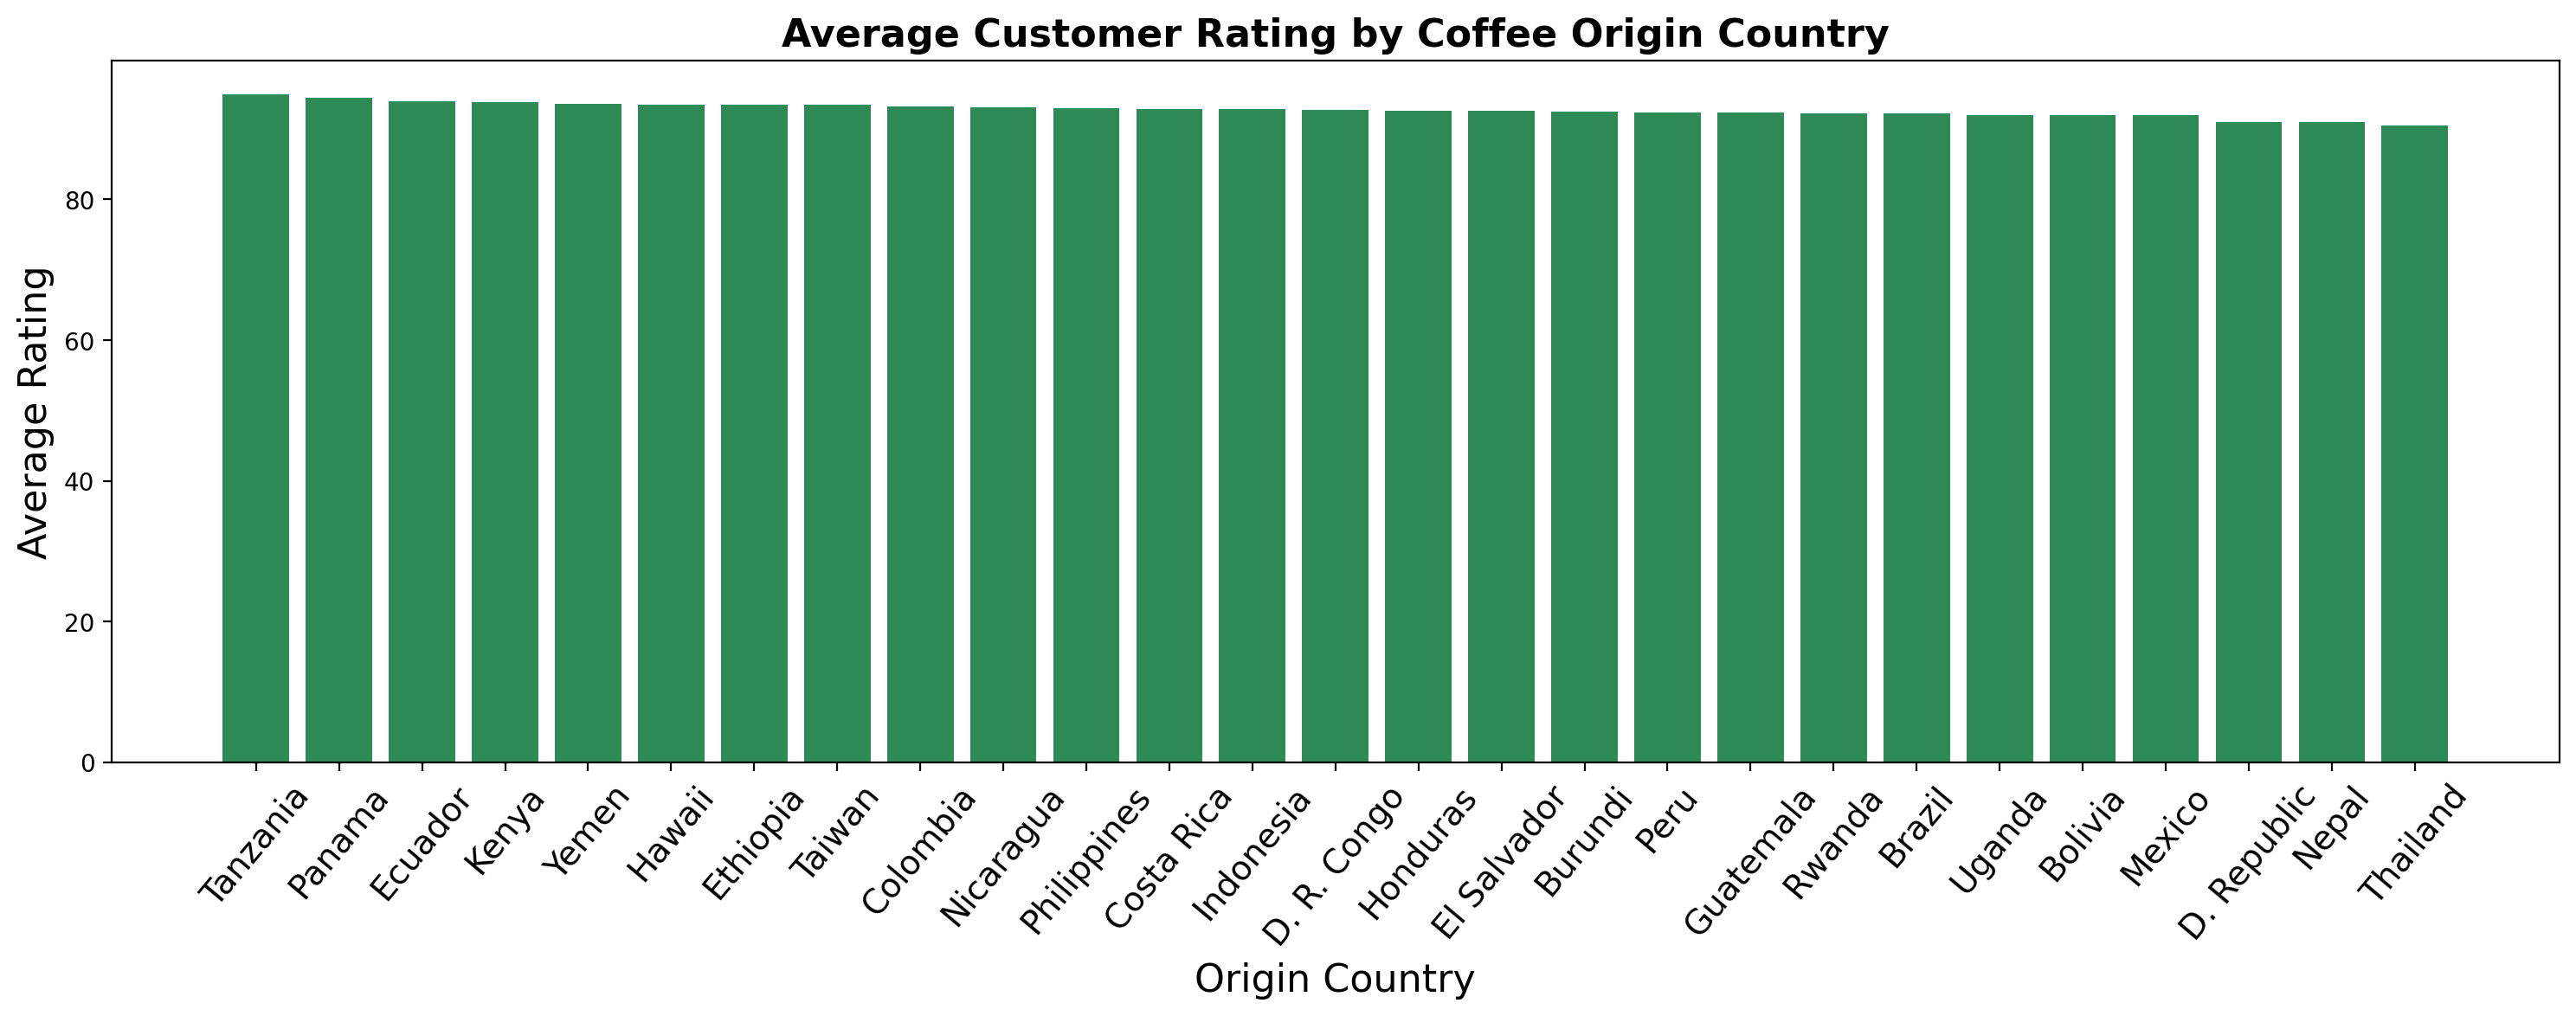

In [28]:

avg_rating_by_origin = coffee_pd.groupby('origin')['rating'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 6))
plt.bar(avg_rating_by_origin.index, avg_rating_by_origin.values, color='seagreen')
plt.title("Average Customer Rating by Coffee Origin Country", fontsize=16, fontweight='bold')
plt.xlabel("Origin Country", fontsize=16)
plt.ylabel("Average Rating", fontsize=16)
plt.xticks(rotation=50, fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 1.0, 'Average Customer Rating by Coffee Origin Country')

Text(0.5, 0, 'Origin Country')

Text(0, 0.5, 'Average Rating')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Tanzania'),
  Text(1, 0, 'Panama'),
  Text(2, 0, 'Ecuador'),
  Text(3, 0, 'Kenya'),
  Text(4, 0, 'Yemen'),
  Text(5, 0, 'Hawaii'),
  Text(6, 0, 'Ethiopia'),
  Text(7, 0, 'Taiwan'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Nicaragua'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'Costa Rica'),
  Text(12, 0, 'Indonesia'),
  Text(13, 0, 'D. R. Congo'),
  Text(14, 0, 'Honduras'),
  Text(15, 0, 'El Salvador'),
  Text(16, 0, 'Burundi'),
  Text(17, 0, 'Peru'),
  Text(18, 0, 'Guatemala'),
  Text(19, 0, 'Rwanda'),
  Text(20, 0, 'Brazil'),
  Text(21, 0, 'Uganda'),
  Text(22, 0, 'Bolivia'),
  Text(23, 0, 'Mexico'),
  Text(24, 0, 'D. Republic'),
  Text(25, 0, 'Nepal'),
  Text(26, 0, 'Thailand')])

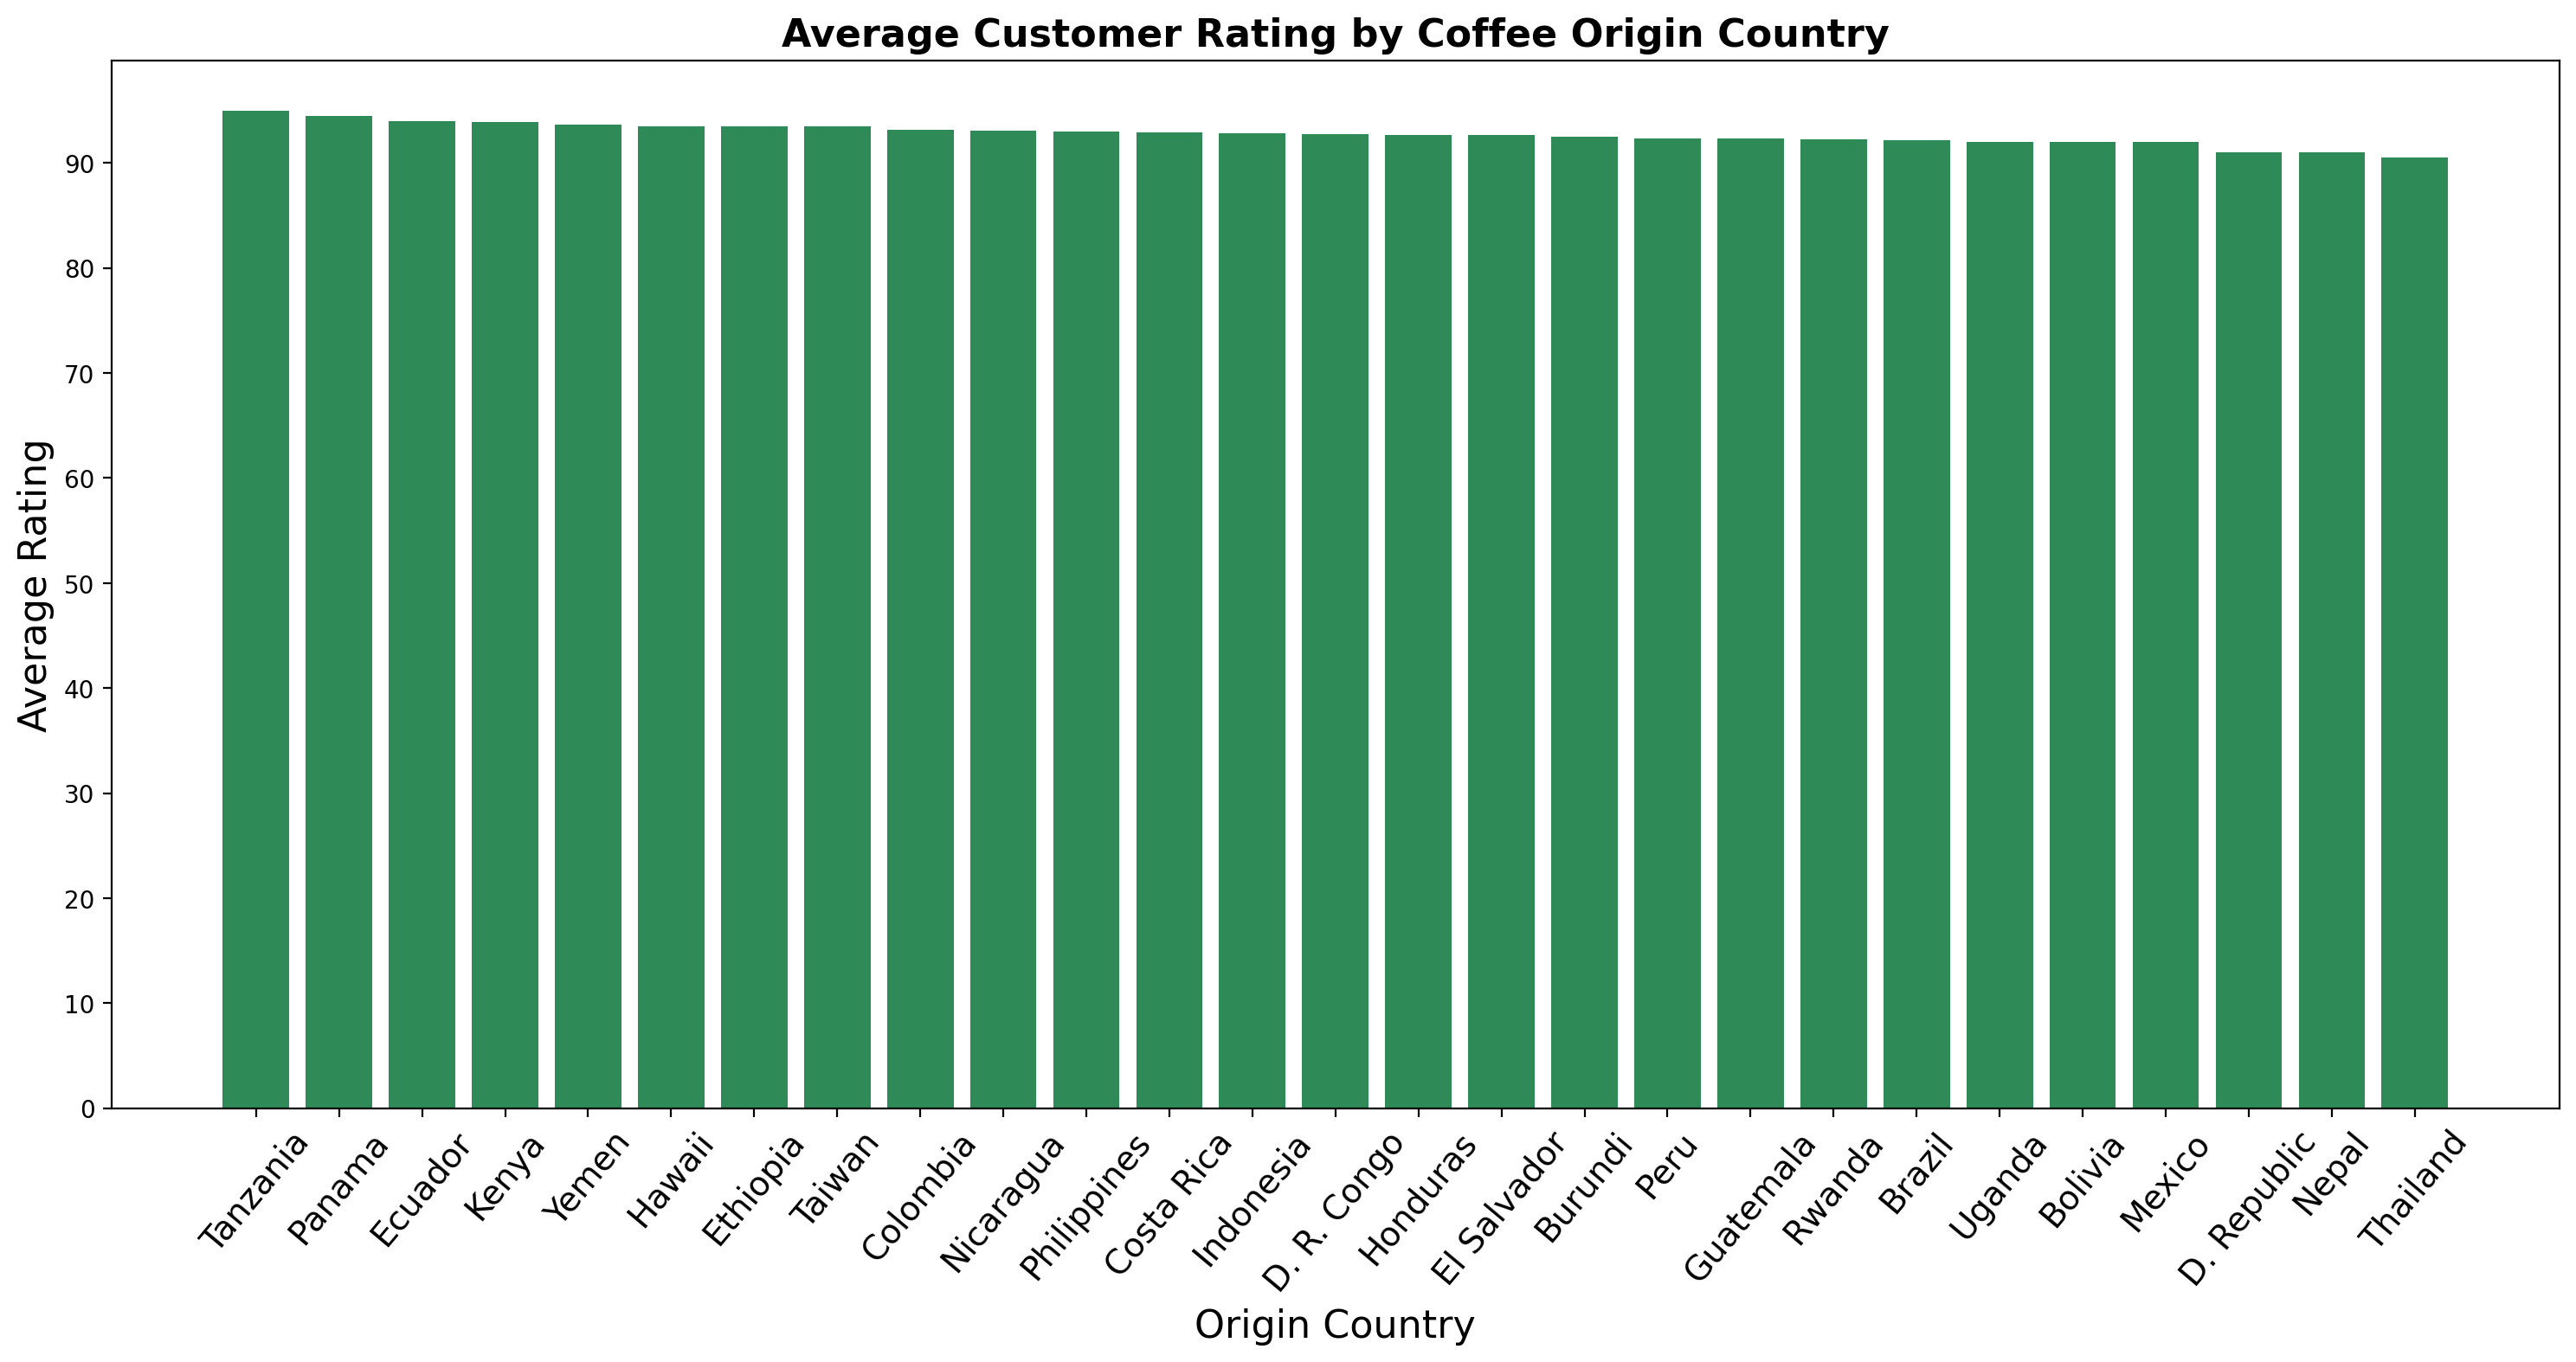

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

avg_rating_by_origin = coffee_pd.groupby('origin')['rating'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 8))
plt.bar(avg_rating_by_origin.index, avg_rating_by_origin.values, color='seagreen')
plt.title("Average Customer Rating by Coffee Origin Country", fontsize=16, fontweight='bold')
plt.xlabel("Origin Country", fontsize=16)
plt.ylabel("Average Rating", fontsize=16)
plt.xticks(rotation=50, fontsize=14)

# Set y-ticks in steps of 10
plt.gca().yaxis.set_major_locator(MultipleLocator(10))

plt.tight_layout()
plt.show()


In [30]:
coffee_pd.groupby(["loc_country"]).size()

loc_country
Australia          1
Canada             5
China              1
England            7
Guatemala         24
Hawaii            77
Hong Kong          9
Japan              8
Kenya              1
New Taiwan         1
Taiwan           338
United States    774
dtype: int64

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Distribution of Coffee Roaster Origins')

Text(0.5, 0, 'Roaster Origin Country')

Text(0, 0.5, 'Number of Cafes')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Taiwan'),
  Text(2, 0, 'Hawaii'),
  Text(3, 0, 'Guatemala'),
  Text(4, 0, 'Hong Kong'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Kenya'),
  Text(11, 0, 'New Taiwan')])

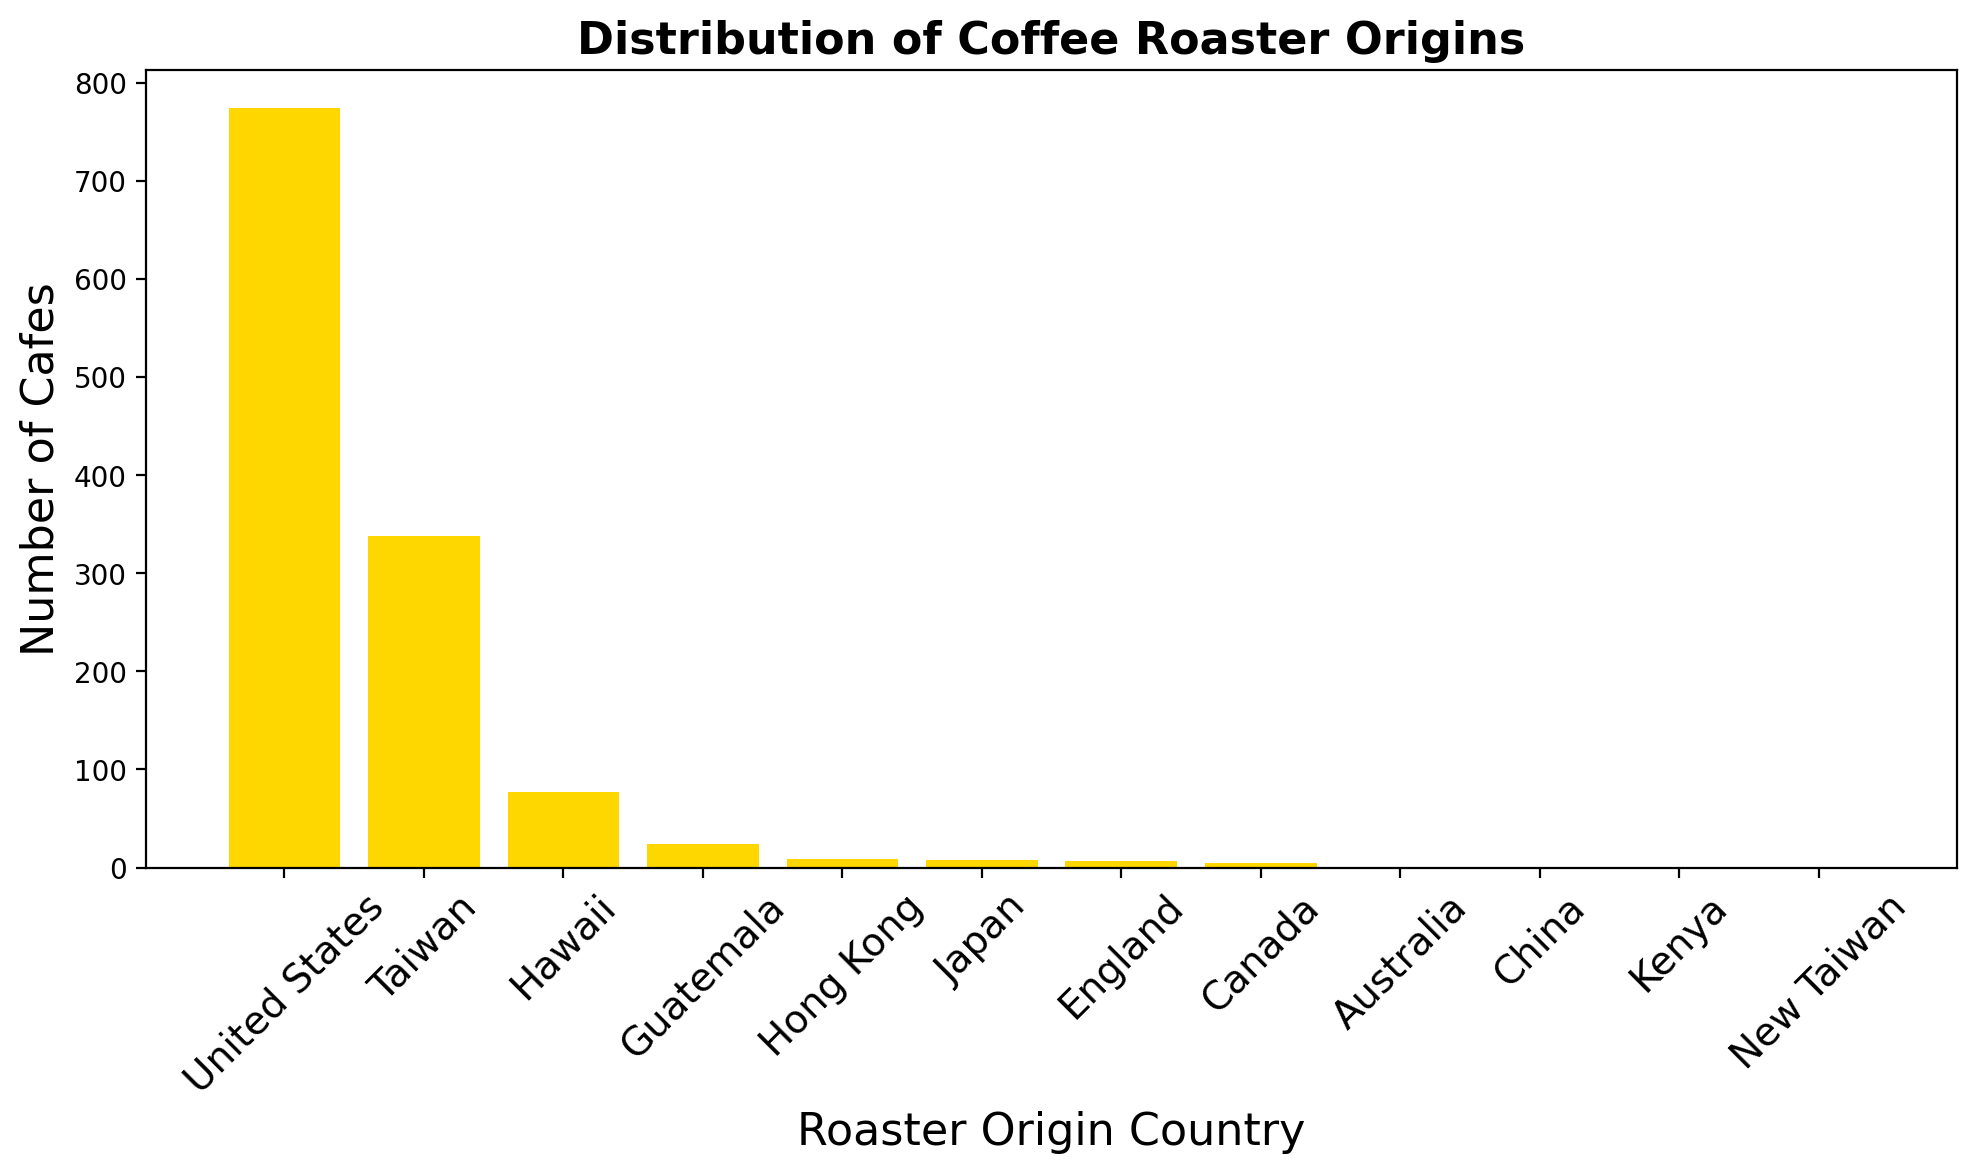

In [31]:

origin_counts = coffee_pd['loc_country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(origin_counts.index, origin_counts.values, color='gold')
plt.title("Distribution of Coffee Roaster Origins",  fontsize=16, fontweight='bold')
plt.xlabel("Roaster Origin Country",  fontsize=16)
plt.ylabel("Number of Cafes",  fontsize=16)
plt.xticks(rotation=45,  fontsize=14)  # Rotate labels for better visibility
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Coffee Roaster Origins')

Text(0.5, 0, 'Roaster Origin Country')

Text(0, 0.5, 'Number of Cafes')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Taiwan'),
  Text(2, 0, 'Hawaii'),
  Text(3, 0, 'Guatemala'),
  Text(4, 0, 'Hong Kong'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Kenya'),
  Text(11, 0, 'New Taiwan')])

Text(0.0, 774, '774')

Text(1.0, 338, '338')

Text(2.0, 77, '77')

Text(3.0, 24, '24')

Text(4.0, 9, '9')

Text(5.0, 8, '8')

Text(6.0, 7, '7')

Text(7.0, 5, '5')

Text(8.0, 1, '1')

Text(9.0, 1, '1')

Text(10.0, 1, '1')

Text(11.0, 1, '1')

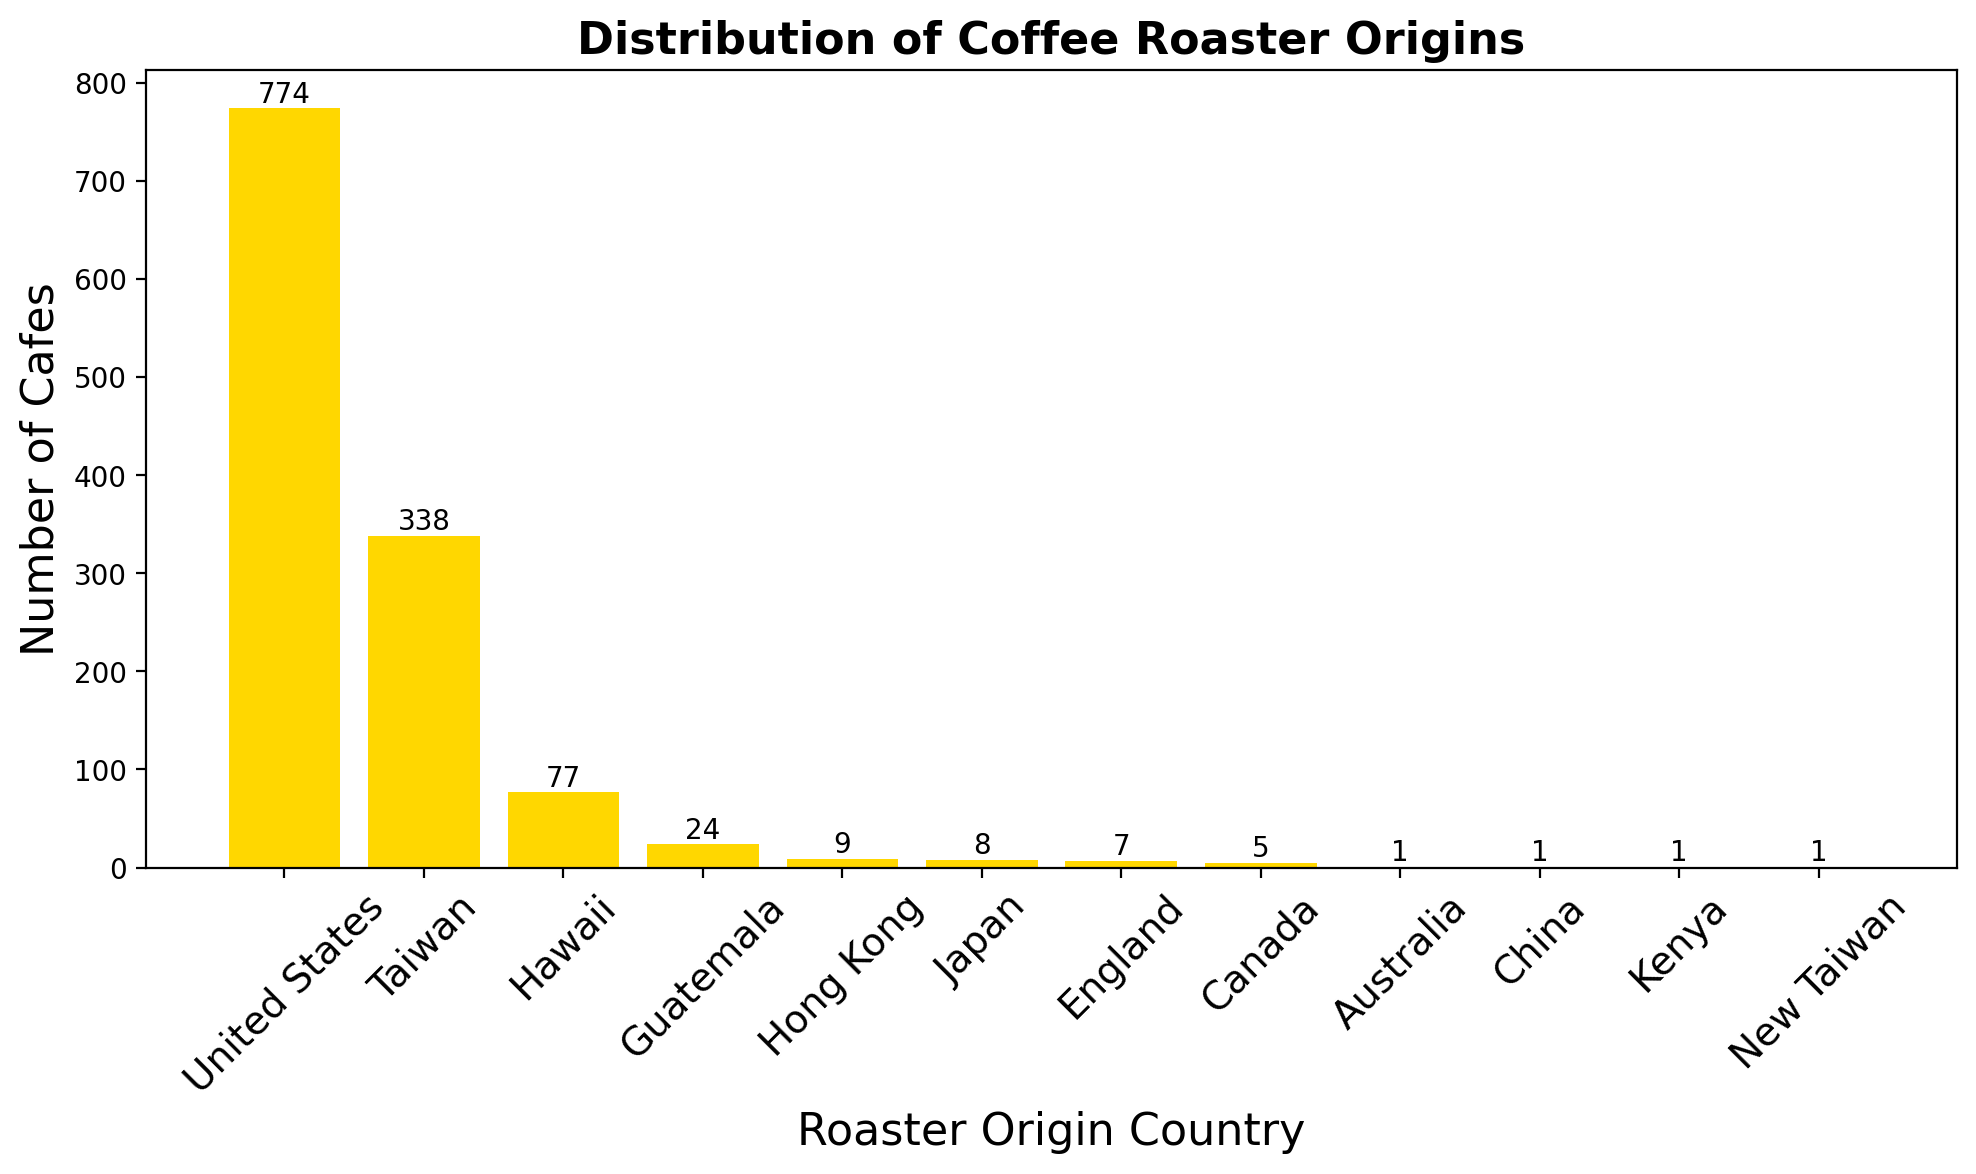

In [33]:
origin_counts = coffee_pd['loc_country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(origin_counts.index, origin_counts.values, color='gold')

plt.title("Distribution of Coffee Roaster Origins", fontsize=16, fontweight='bold')
plt.xlabel("Roaster Origin Country", fontsize=16)
plt.ylabel("Number of Cafes", fontsize=16)
plt.xticks(rotation=45, fontsize=14)

# Add exact count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                            # Y position (top of bar)
        f'{int(height)}',                  # Label text
        ha='center', va='bottom', fontsize=10  # Centered horizontally, slightly above the bar
    )

plt.tight_layout()
plt.show()


In [28]:
coffee_pd.groupby(["roaster"]).size()

roaster
1951 Coffee Company           1
1980 CAFE                     4
94 Fresh Coffee               3
A.R.C.                        3
AKA Coffee Roasters           1
                             ..
Wildgoose Coffee Roasters     1
Willoughby's Coffee & Tea     9
Wonderstate Coffee            5
Yellow Brick Coffee           2
modcup coffee                12
Length: 300, dtype: int64

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Top 20 Coffee Roasters by Number of Users')

Text(0.5, 0, 'Number of Users')

Text(0, 0.5, 'Roaster')

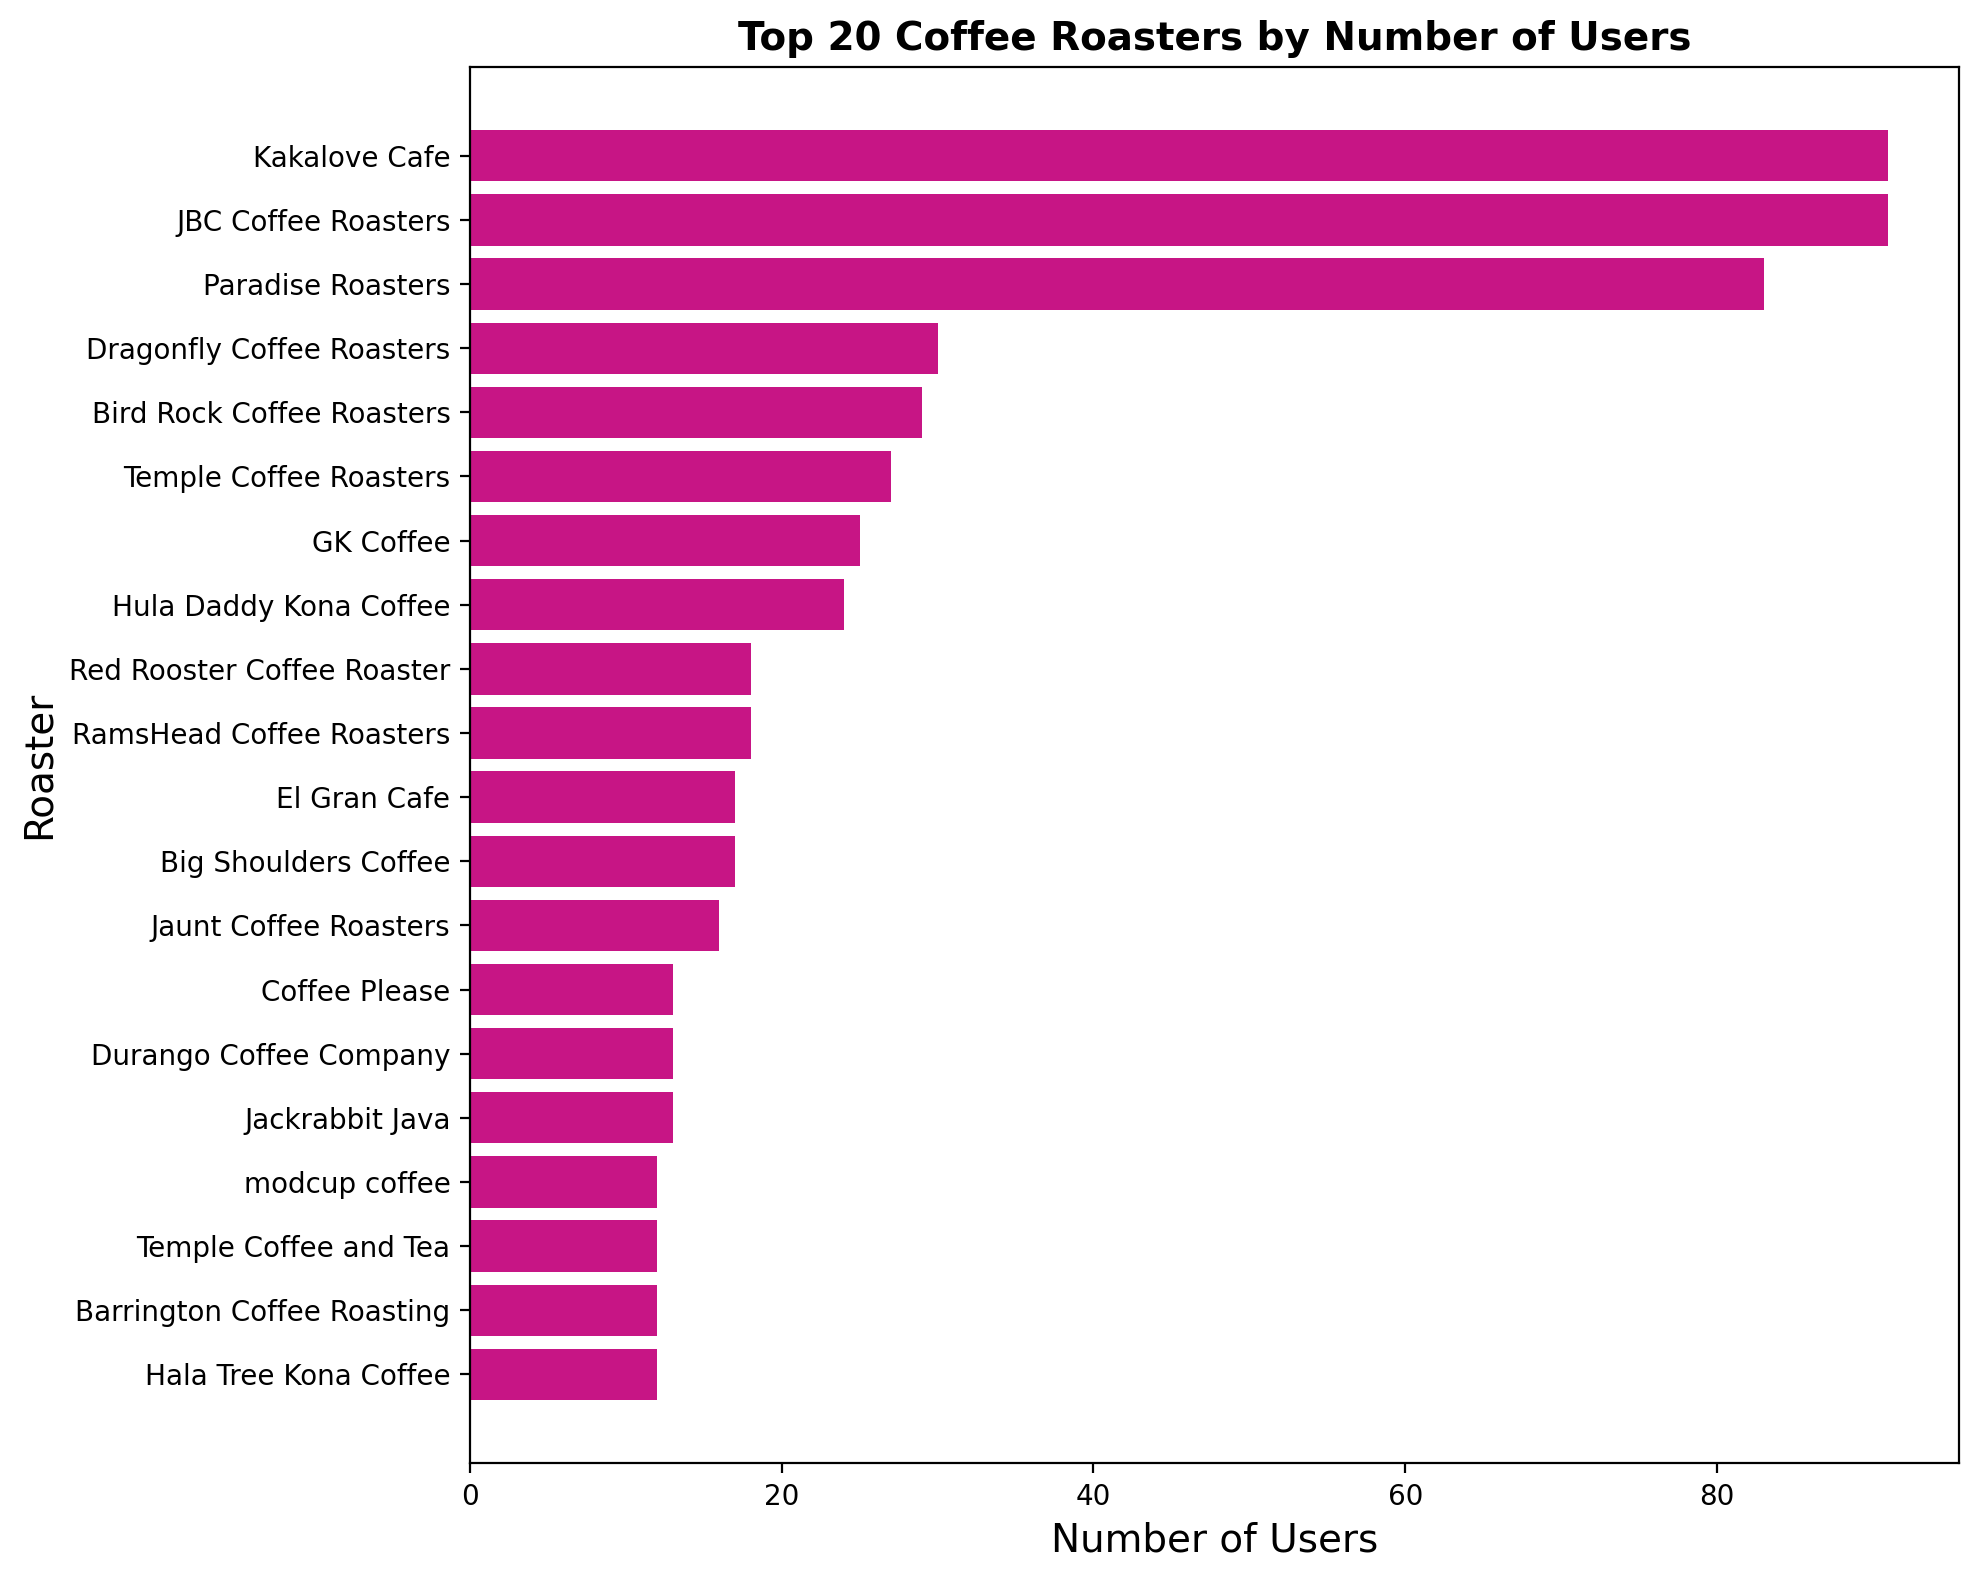

In [29]:

roaster_counts = coffee_pd['roaster'].value_counts().head(20)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(roaster_counts.index[::-1], roaster_counts.values[::-1], color='mediumvioletred')
plt.title("Top 20 Coffee Roasters by Number of Users",  fontsize=14, fontweight='bold')
plt.xlabel("Number of Users",  fontsize=14)
plt.ylabel("Roaster",  fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Top 15 Roasters with Country')

Text(0.5, 0, 'Number of Users')

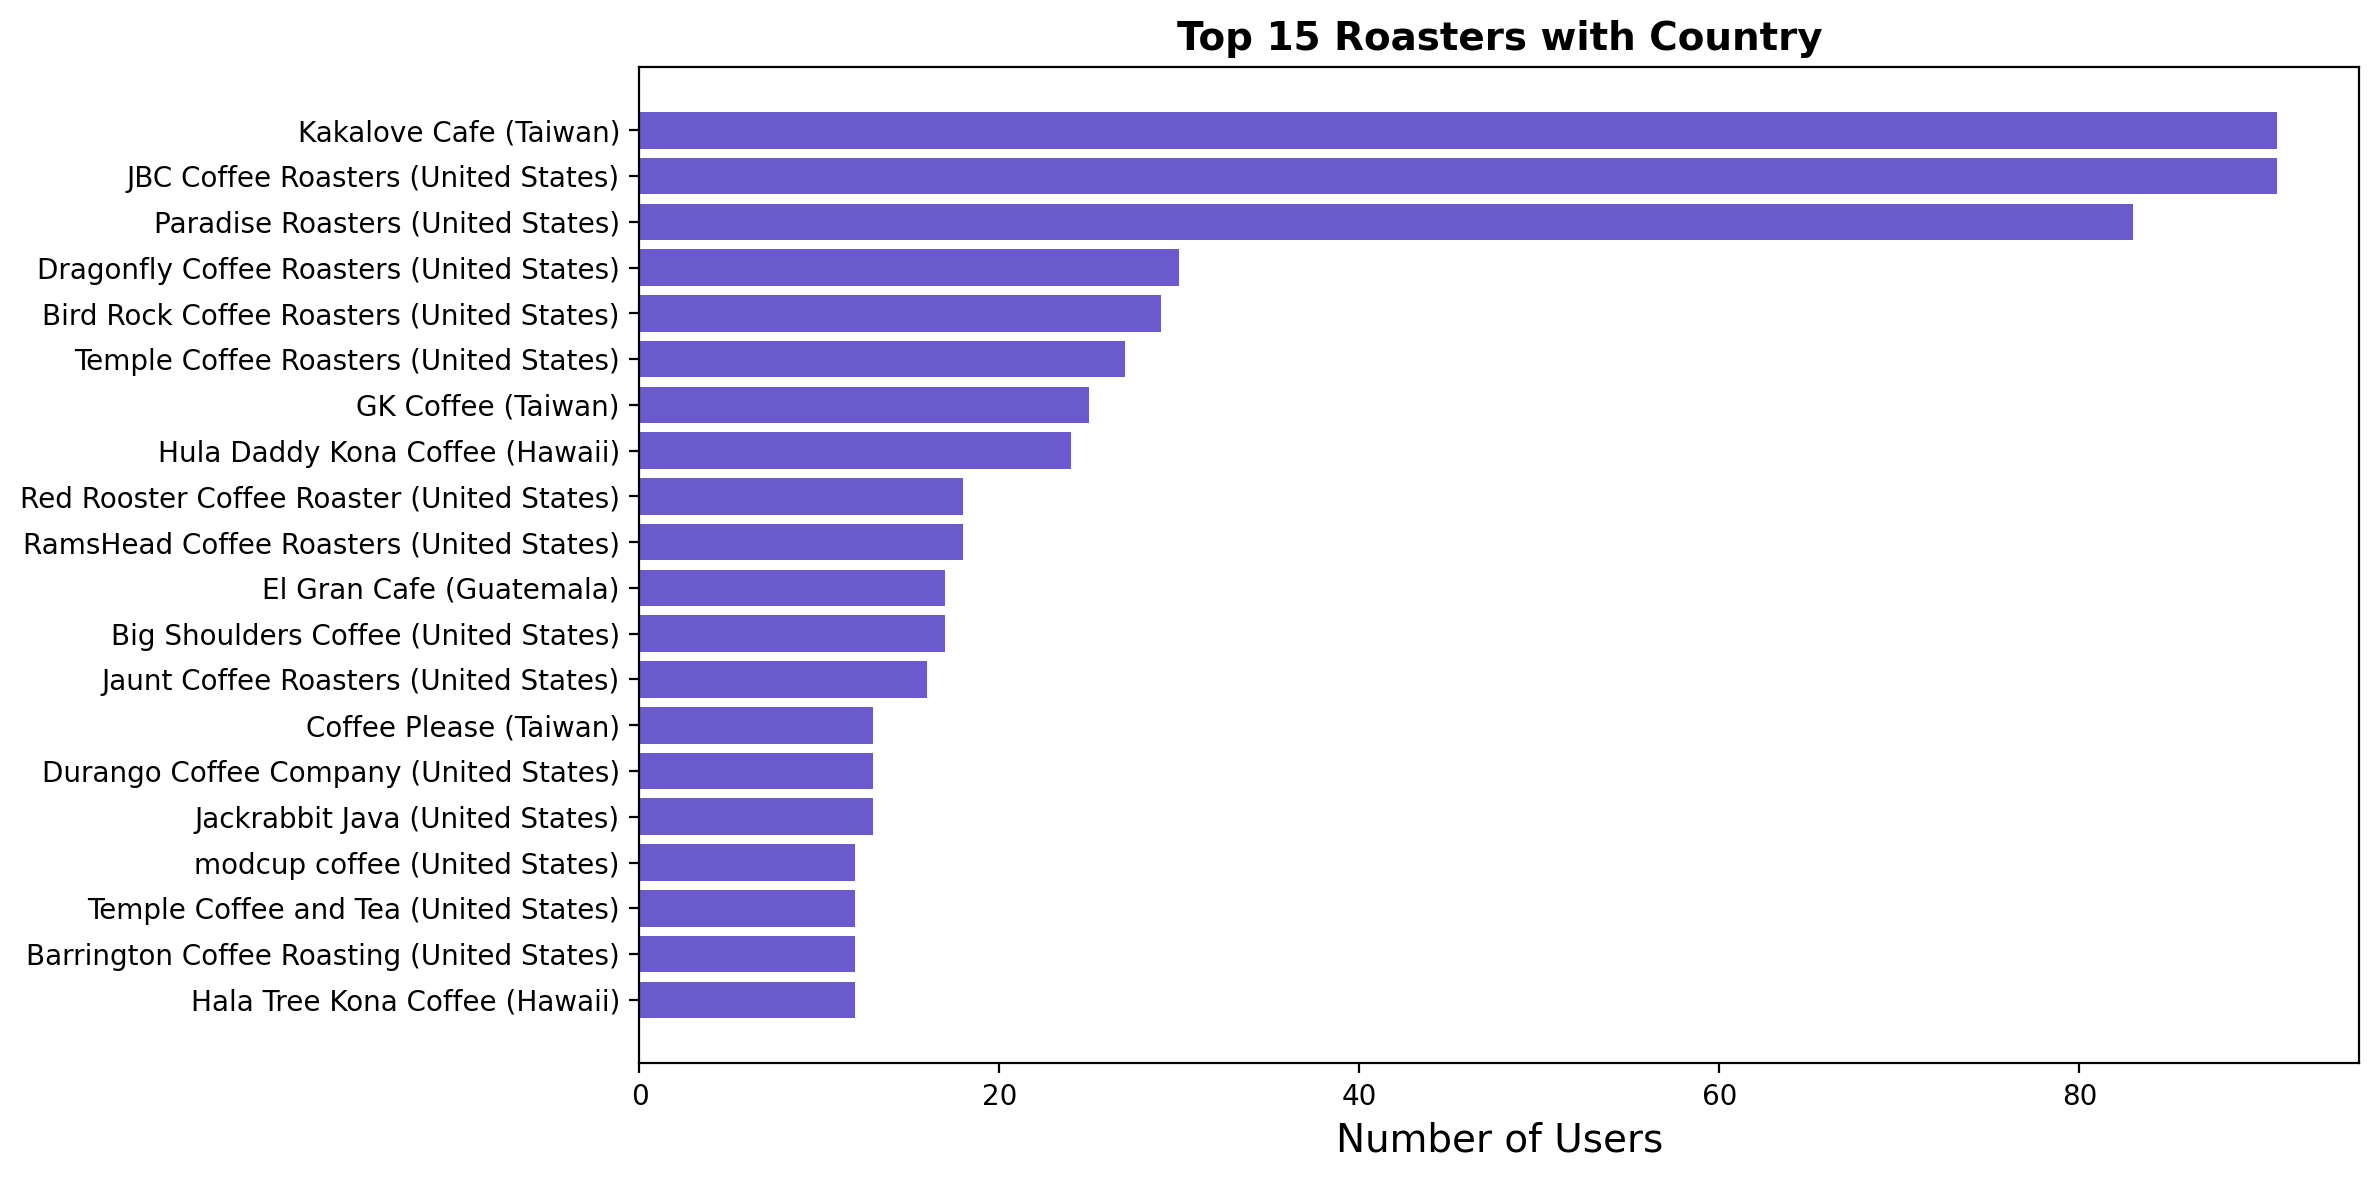

In [30]:

roaster_counts = coffee_pd['roaster'].value_counts().head(20)
top_roasters = roaster_counts.index

# Get their countries
roaster_country_map = coffee_pd.set_index('roaster')['loc_country'].to_dict()
roaster_labels = [f"{r} ({roaster_country_map.get(r, 'Unknown')})" for r in top_roasters]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(roaster_labels[::-1], roaster_counts.values[::-1], color='slateblue')
plt.title("Top 15 Roasters with Country",  fontsize=14, fontweight='bold')
plt.xlabel("Number of Users",  fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Average Customer Rating by Roaster Coffee Origin Country')

Text(0.5, 0, 'Roaster Origin Country')

Text(0, 0.5, 'Average Rating')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'Kenya'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Hawaii'),
  Text(6, 0, 'United States'),
  Text(7, 0, 'New Taiwan'),
  Text(8, 0, 'Hong Kong'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Guatemala'),
  Text(11, 0, 'China')])

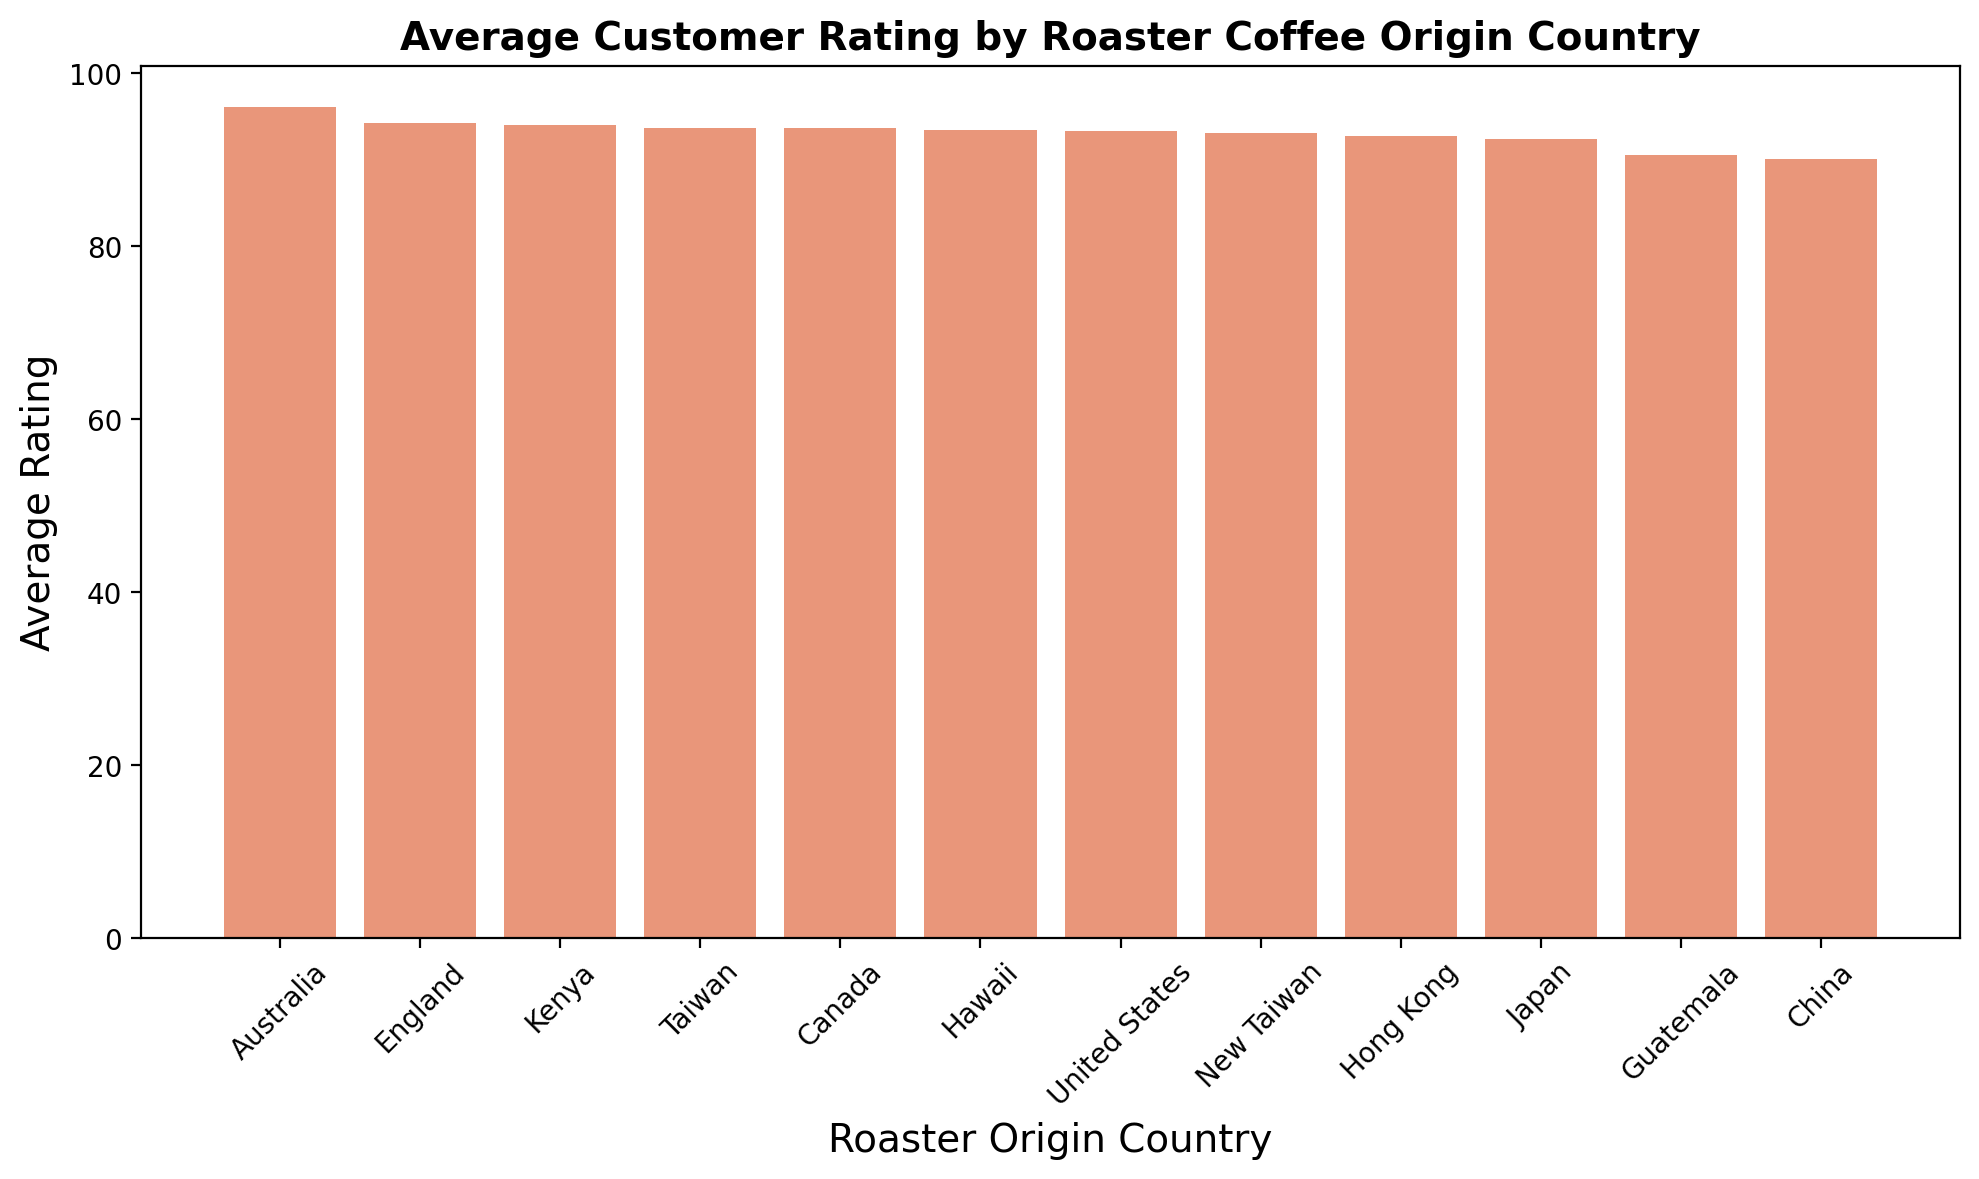

In [31]:
import matplotlib.pyplot as plt

# Group by origin and compute average rating
avg_rating_by_origin = coffee_pd.groupby('loc_country')['rating'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_rating_by_origin.index, avg_rating_by_origin.values, color='darksalmon')
plt.title("Average Customer Rating by Roaster Coffee Origin Country",  fontsize=14, fontweight='bold')
plt.xlabel("Roaster Origin Country",  fontsize=14) 
plt.ylabel("Average Rating",  fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, 'Top 15 Roasters by Average Customer Rating')

Text(0.5, 0, 'Average Rating')

Text(0, 0.5, 'Roaster')

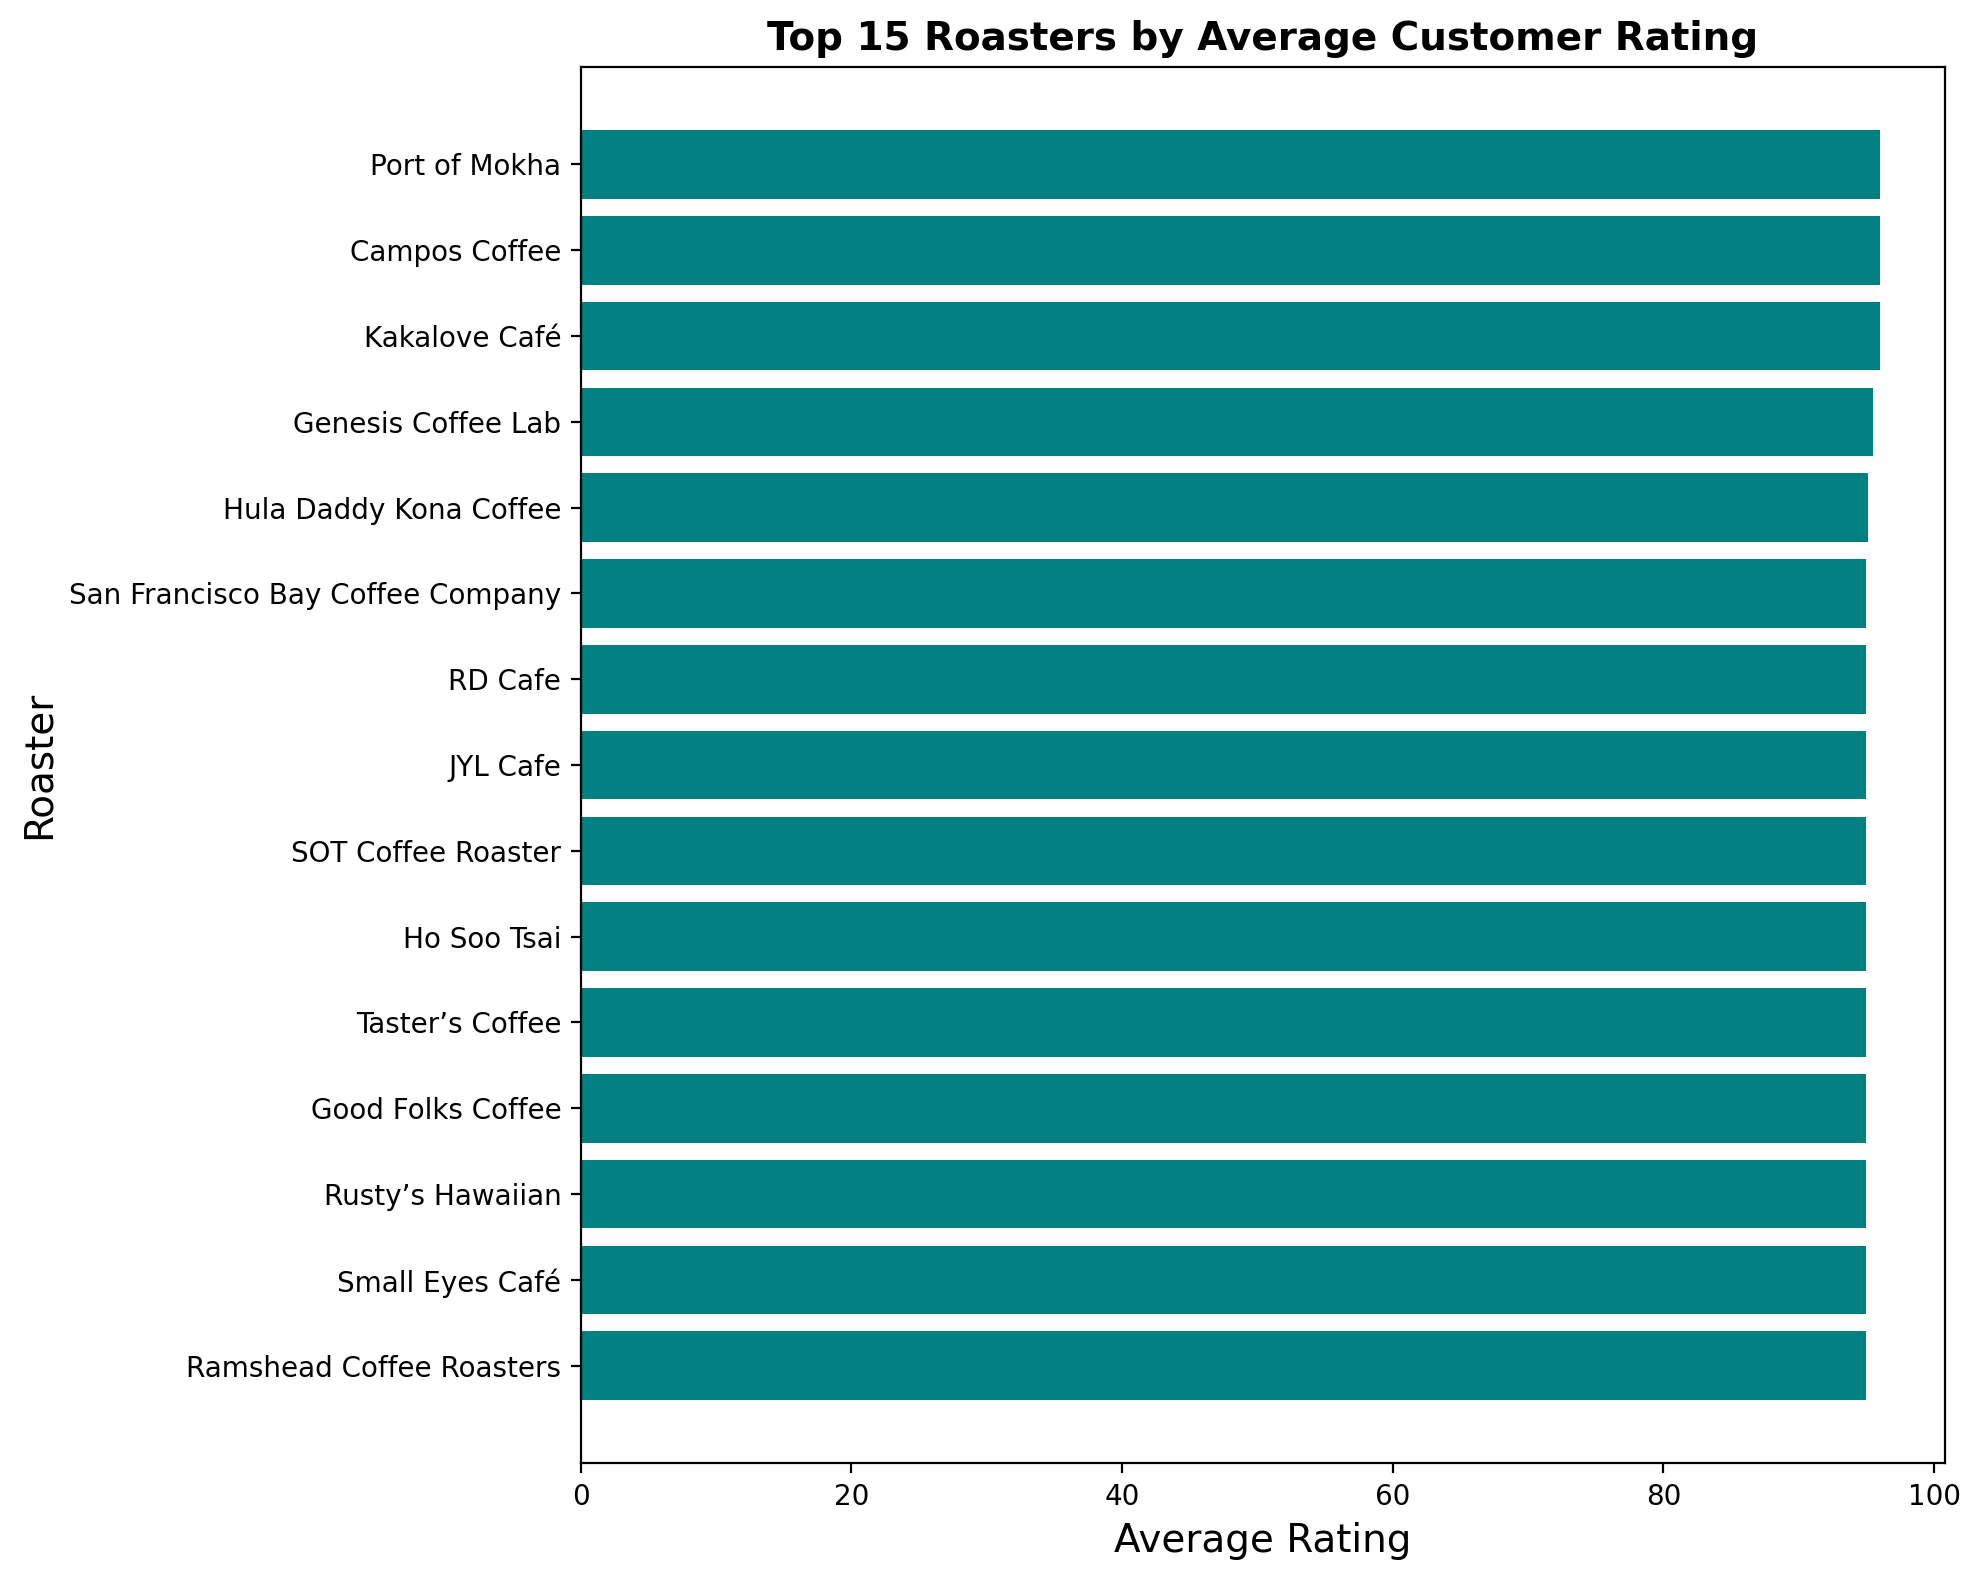

In [32]:
# Top 15 countries by average rating
top_rating = coffee_pd.groupby('roaster')['rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
plt.barh(top_rating.index[::-1], top_rating.values[::-1], color='teal')
plt.title("Top 15 Roasters by Average Customer Rating",  fontsize=14, fontweight='bold')
plt.xlabel("Average Rating",  fontsize=14)
plt.ylabel("Roaster",  fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Type of Roast by Average Customer Rating')

Text(0.5, 0, 'Average Rating')

Text(0, 0.5, 'Type of Roast')

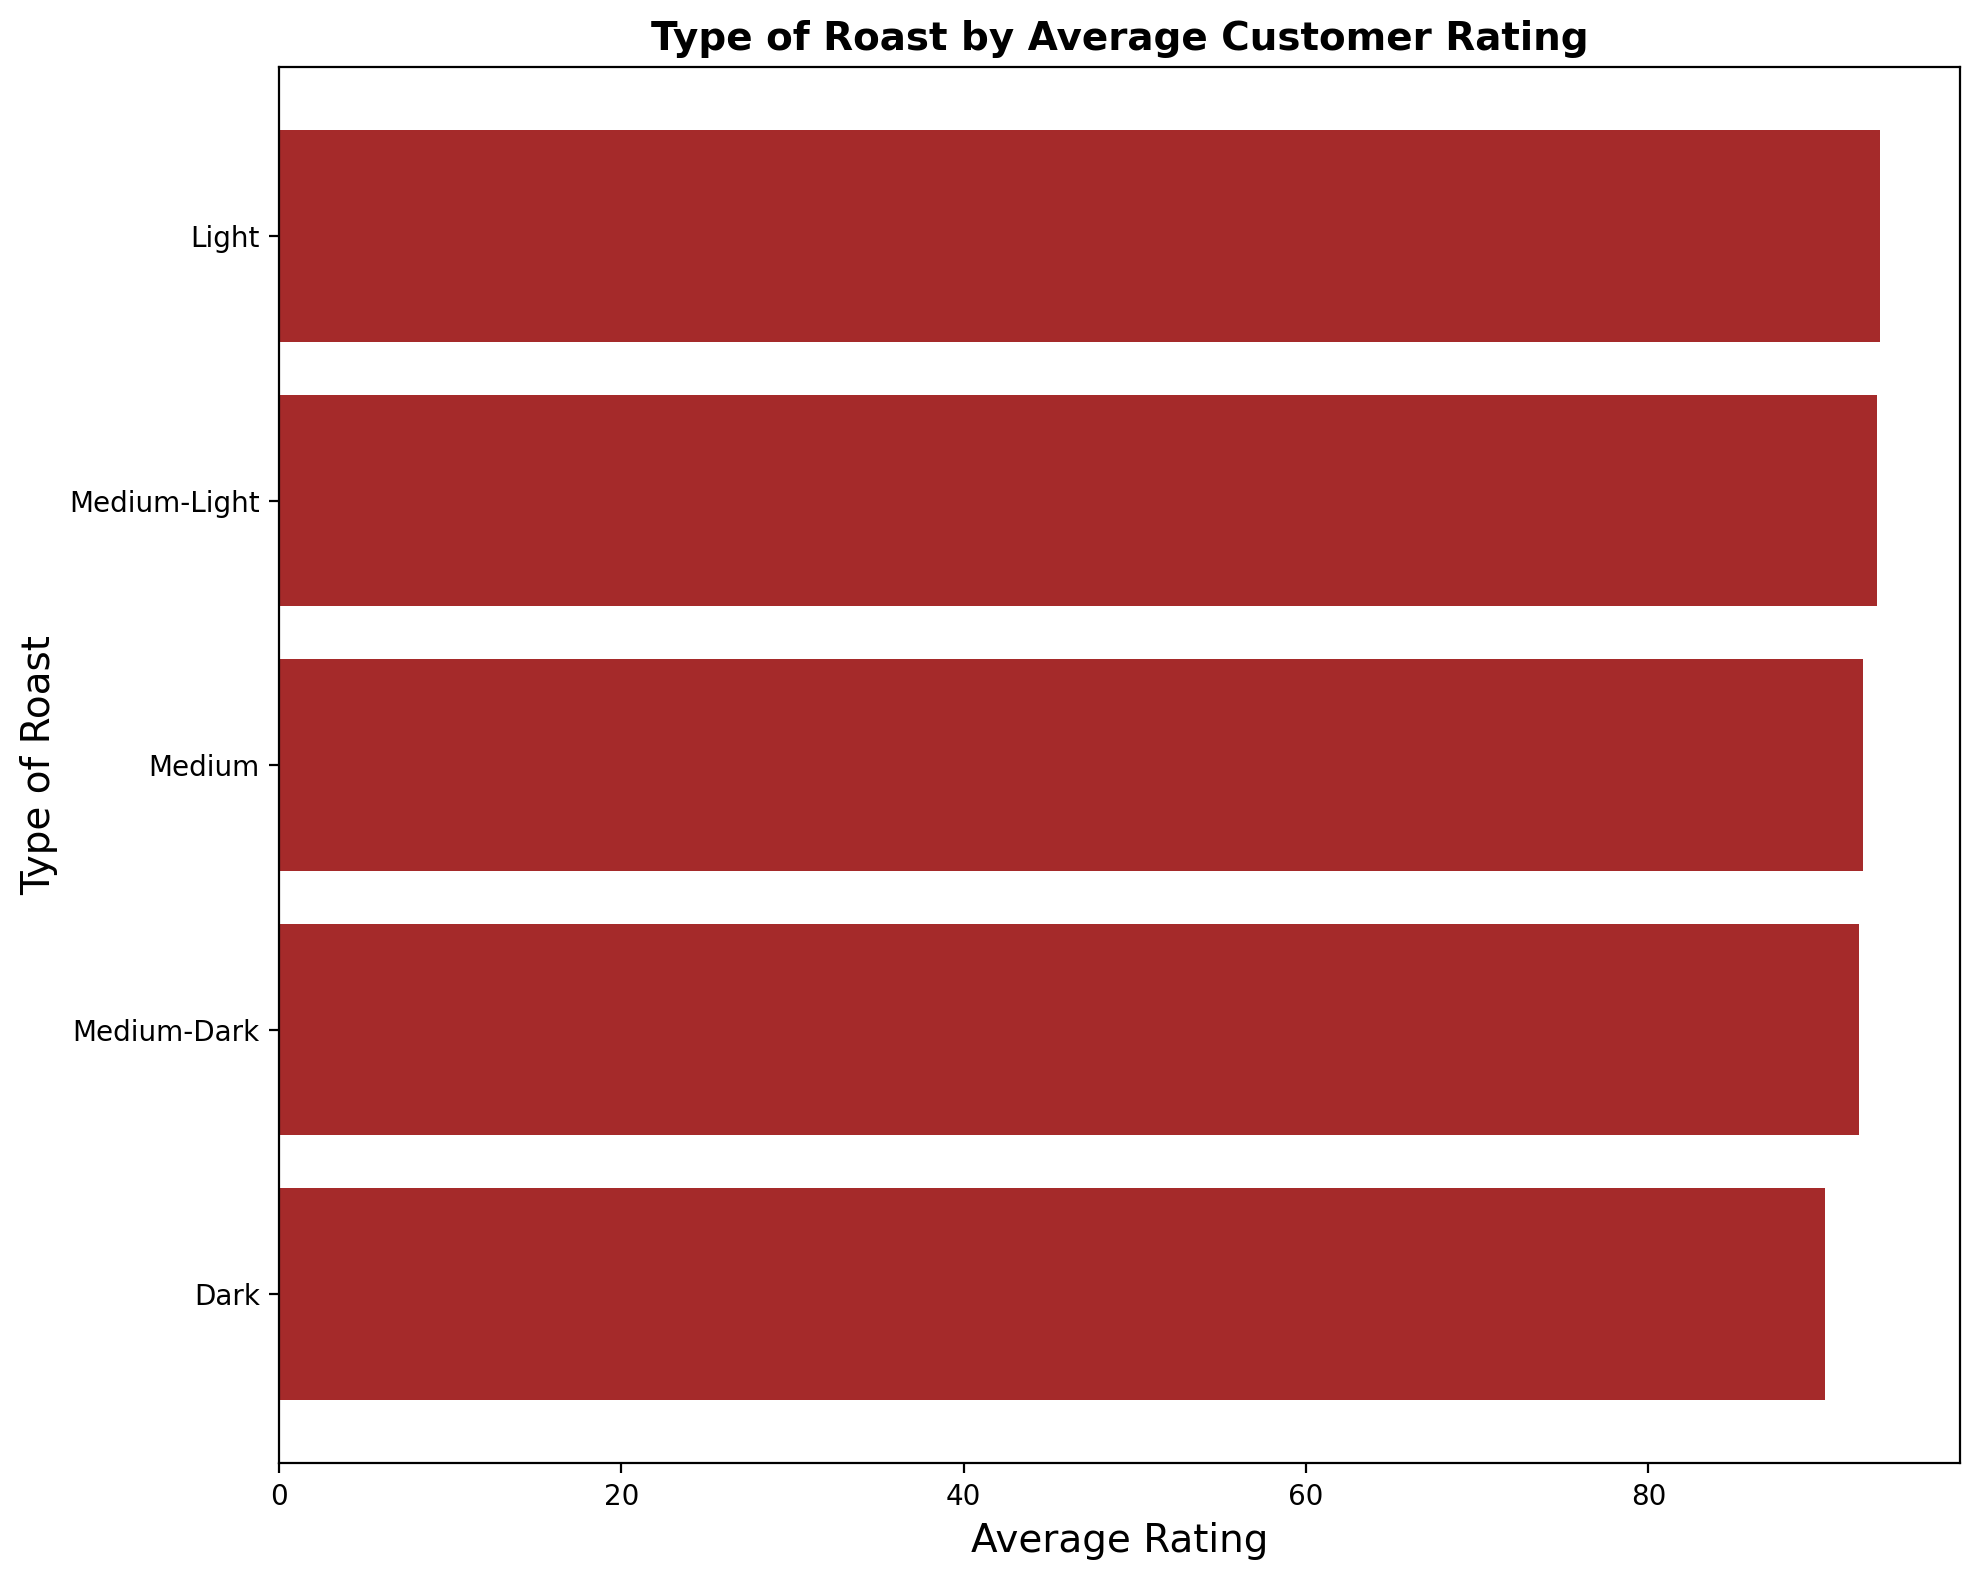

In [33]:
# Top 15 countries by average rating
top_rating = coffee_pd.groupby('roast')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(top_rating.index[::-1], top_rating.values[::-1], color='brown')
plt.title("Type of Roast by Average Customer Rating",  fontsize=14, fontweight='bold')
plt.xlabel("Average Rating",  fontsize=14)
plt.ylabel("Type of Roast",  fontsize=14)
plt.tight_layout()
plt.show()
